In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())

3969784


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

## ImageAnalysis3 section:

In [3]:
import ImageAnalysis3 as ia3

In [4]:
import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

In [5]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 18,
             'correction_folder':r'/lab/weissman_imaging/puzheng/Corrections/20240107-Merscope01_s40_n500',
             'shared_parameters':{
                     'single_im_size':[40, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':1,
                     'max_num_seeds': 300,
                     'spot_seeding_th': 500,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/
-- 27 folders, 82 fovs detected.


In [6]:
_overwrite = False

_save_images = True

_warp_image = True

_fit_spots = True

sel_fov_ids = np.arange(0,82)
# 0-60: not warpped

for _fov_id in sel_fov_ids:
    # 1. create fov class:
    if 'bad_fovs_ids' in locals() and  _fov_id in bad_fovs_ids:
        continue
    
    fov = ia3.classes.field_of_view.Field_of_View(fov_param, _fov_id=_fov_id,
                                              _color_info_kwargs={
                                                  '_color_filename':'Color_Usage',
                                              }, 
                                              _prioritize_saved_attrs=False,
                                              _save_info_to_file=True, # whether overwrite
                                              )
    fov._save_to_file('merfish')
    # 1.5. Process DAPI image
    fov._load_dapi_image()
    
    # 2. Process image into candidate spots
    fov.parallel = False
    setattr(fov, "merfish_ref_id", 0)
    fov._process_image_to_spots('merfish', 
                                _sel_ids=[52,53],
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=True,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)
    fov._process_image_to_spots('merfish', 
                                _load_common_reference=True, _load_with_multiple=False,
                                _save_images=_save_images,
                                _warp_images=_warp_image, _fit_spots=False,
                                _overwrite_drift=False, _overwrite_image=_overwrite,
                                _overwrite_spot=_overwrite)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 27
- Number of field of views: 82
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 18 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_00.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 7.312s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_00.hdf5
Reference channel: 637
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.

- loading merfish info from file:Conv_zscan_01.hdf5 in 8.073s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_01.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_01.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_01.hdf5 in 7.873s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_01.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_01.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_01.hdf5 in 8.002s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dn

- loading merfish info from file:Conv_zscan_02.hdf5 in 1.198s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_02.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_02.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_02.dax  in 9.862s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.315s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.073s
-- illumination correction for channels: 748, 637, 545, 477, in 3.980s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.2   5.9   5.11] in 2.503s.
-- drift 1: [-1.12  5.76  4.92] in 2.506s.
-- drift 2: [-1.7   5

- loading merfish info from file:Conv_zscan_02.hdf5 in 7.207s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_02.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_02.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_02.hdf5 in 6.142s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_02.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_02.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_02.hdf5 in 5.638s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-M

-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5.
save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.577s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 285.059s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
-- updated spots for id:[52, 53] in 0.111s
in 713.72s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.036s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 38 39] in 0.009s.
-- checking merfish, region:[40 41 42] in 0.009s.
-- checking merfish, reg

-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 5.182s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_03.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_03.hdf5 in 1.098s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_03.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_03.dax  in 7.338s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.236s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.076s
-- illumination correction for channels: 748, 637, 545

-- illumination correction for channels: 748, 637, 545, 477, in 6.948s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.42  7.91  5.34] in 2.551s.
-- drift 1: [-1.43  7.74  4.9 ] in 2.400s.
-- drift 2: [-1.41  7.85  3.54] in 2.380s.
-- drift 3: [-0.96  7.51  3.68] in 2.376s.
--- drifts for crops:[0 1 2 3] pass the thresold, exit cycle.
--- finish drift: [-1.3   7.75  4.36] in 9.717s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-1.3   7.75  4.36] 748, 637, 545, in 288.986s
-- finish correction in 338.482s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.174s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_03.dax for channels:['748'

- loading merfish info from file:Conv_zscan_03.hdf5 in 1.184s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_03.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_03.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_03.dax  in 7.156s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.502s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.330s
-- illumination correction for channels: 748, 637, 545, 477, in 6.909s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.84  6.95  2.45] in 2.541s.
-- drift 1: [-0.88  6.79  1.99] in 2.500s.
-- drift 2: [-0.6

-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 400.073s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5
-- updated spots for id:[52, 53] in 0.067s
in 774.30s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.022s.
-- checking merfish, region:[1 2 3] in 0.013s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.011s.
-- checking merfish, region:[25 26 27] in 0.011s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.011s.
-- checking merfish, region:[34 35 36] in 0.011s.
-- checking merfish, region:[37 38 39] in 0.011s.
-- checking merfish, region:[40 41 42] in 0.013s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_04.hdf5 in 0.977s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_04.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_04.dax  in 6.881s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.926s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.043s
-- illumination correction for channels: 748, 637, 545, 477, in 6.768s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.95  6.37  3.14] in 2.541s.
-- drift 1: [-0.43  6.52  2.45] in 2.471s.
-- drift 2: [-0.71  6

- loading merfish info from file:Conv_zscan_04.hdf5 in 1.007s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_04.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_04.dax  in 6.637s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.998s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.106s
-- illumination correction for channels: 748, 637, 545, 477, in 6.777s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.    5.22  4.14] in 2.477s.
-- drift 1: [-0.64  5.26  3.53] in 2.437s.
-- drift 2: [-0.83 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.107s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_04.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_04.hdf5 in 0.966s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_04.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_04.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_04.dax  in 7.389s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.391s
-- bleedthrough correction for channels: ['748', '637', '545'] in 18.027s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.601s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
--- merfish attributes updated:[] in 0.007s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_05.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 608.303s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 398.488s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
-- updated spots for id:[52, 53] in 0.064s
in 1258.50s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.024s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37 3

- loading merfish info from file:Conv_zscan_05.hdf5 in 1.098s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_05.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_05.dax  in 7.132s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 33.602s
-- bleedthrough correction for channels: ['748', '637', '545'] in 25.099s
-- illumination correction for channels: 748, 637, 545, 477, in 9.889s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.77  6.16  2.68] in 2.598s.
-- drift 1: [-0.92  6.38  2.49] in 2.604s.
-- drift 2: [-1.04  6

- loading merfish info from file:Conv_zscan_05.hdf5 in 0.993s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_05.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_05.dax  in 7.939s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 25.168s
-- bleedthrough correction for channels: ['748', '637', '545'] in 20.582s
-- illumination correction for channels: 748, 637, 545, 477, in 10.709s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.81  6.14  2.87] in 2.572s.
-- drift 1: [-0.89  6.31  2.71] in 2.540s.
-- drift 2: [-1.02

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.549s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_05.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_05.hdf5 in 0.970s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_05.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_05.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_05.dax  in 9.930s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 24.829s
-- bleedthrough correction for channels: ['748', '637', '545'] in 20.543s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_06.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.645s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_06.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.009s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_06.hdf5
--- merfish attributes updated:[] in 0.007s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_06.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_06.dax  in 9.823s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.251s
-- bleedthrough correction for channels: ['748', '637', '545'] in 23.049s
-- illumination correction for channels: 748, 637, 545, 477, in 7.091s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.03  6.84  2.21] in 2.568s.
-- drift 1: [-0.84  6.44  2.55] in 2.545s.
-- drift 2: [-0.56  5.98  2.09] in 2.558s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.81  6.42  2.28] in 7.679s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.81  6.42  2.28] 748, 637, 545, in 301.710s
-- finish correction in 364.741s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_06.dax  in 8.909s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 40.408s
-- bleedthrough correction for channels: ['748', '637', '545'] in 29.911s
-- illumination correction for channels: 748, 637, 545, 477, in 12.179s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.06  6.38  0.92] in 2.515s.
-- drift 1: [-0.85  6.    1.27] in 2.624s.
-- drift 2: [-0.5   5.42  0.72] in 2.577s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.8   5.93  0.97] in 7.722s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.8   5.93  0.97] 748, 637, 545, in 315.935s
-- finish correction in 417.133s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_06.dax  in 7.197s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 32.378s
-- bleedthrough correction for channels: ['748', '637', '545'] in 33.728s
-- illumination correction for channels: 748, 637, 545, 477, in 9.688s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.1   5.03  2.08] in 2.553s.
-- drift 1: [-0.95  4.7   2.4 ] in 2.526s.
-- drift 2: [-0.76  4.3   2.  ] in 2.478s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.94  4.68  2.16] in 7.565s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.94  4.68  2.16] 748, 637, 545, in 315.824s
-- finish correction in 407.676s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_07.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5.
* cre

-- drift 5: [-9.12  6.88  1.17] in 2.408s.
--- drifts for crops:[0 1 5] pass the thresold, exit cycle.
--- finish drift: [-9.09  6.95  1.39] in 14.683s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-9.09  6.95  1.39] 748, 637, in 181.723s
-- finish correction in 226.606s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.566s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 482.809s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 485.255s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5
-- updated spots for id:[52, 53] in 0.144s
in 1199.51s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.020s.
-- checking merfish, region:[1 2 3] in 0.014s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.012s.
-- checking merfish, region:[25 26 27] in 0.011s.
-- checking merfish, region:[28 29 30] in 0.011s.
-- checking merfish, region:[31 32 33] in 0.011s.
-- checking merfish, region:[34 35 36] in 0.011s.
-- checking merfish, region:[37 38 39] in 0.013s.
-- checking merfish, region:[40 41 42] in 0.011s.
-- checking merfish, re

- loading merfish info from file:Conv_zscan_07.hdf5 in 0.980s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_07.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_07.dax  in 10.230s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 26.560s
-- bleedthrough correction for channels: ['748', '637', '545'] in 21.228s
-- illumination correction for channels: 748, 637, 545, 477, in 14.417s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.08  5.86  2.29] in 3.209s.
-- drift 1: [-0.85  5.5   1.96] in 2.983s.
-- drift 2: [-0.92 

- loading merfish info from file:Conv_zscan_07.hdf5 in 1.060s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_07.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_07.dax  in 7.048s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.345s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.127s
-- illumination correction for channels: 748, 637, 545, 477, in 7.277s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.02  6.16  3.81] in 2.679s.
-- drift 1: [-0.76  5.83  3.52] in 2.684s.
-- drift 2: [-0.91 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.183s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_07.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_07.hdf5 in 0.814s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_07.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_07.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_07.dax  in 9.355s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 29.206s
-- bleedthrough correction for channels: ['748', '637', '545'] in 25.723s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_08.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.722s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_08.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_08.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_08.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_08.dax  in 6.675s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.005s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.059s
-- illumination correction for channels: 748, 637, 545, 477, in 6.836s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.76  5.74  4.8 ] in 2.513s.
-- drift 1: [-0.49  6.76  4.84] in 2.487s.
-- drift 2: [-0.94  6.49  5.13] in 2.444s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.73  6.33  4.92] in 7.452s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.73  6.33  4.92] 748, 637, 545, in 282.509s
-- finish correction in 328.666s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_08.dax  in 7.329s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.998s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.413s
-- illumination correction for channels: 748, 637, 545, 477, in 6.706s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.74  5.61  2.79] in 2.434s.
-- drift 1: [-0.43  6.63  2.81] in 2.382s.
-- drift 2: [-0.98  6.38  3.15] in 2.361s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.72  6.21  2.92] in 7.184s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.72  6.21  2.92] 748, 637, 545, in 286.663s
-- finish correction in 334.423s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_08.dax  in 8.132s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 20.144s
-- bleedthrough correction for channels: ['748', '637', '545'] in 20.765s
-- illumination correction for channels: 748, 637, 545, 477, in 6.809s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.96  6.16  3.49] in 2.497s.
-- drift 1: [-0.85  7.3   3.58] in 2.482s.
-- drift 2: [-1.1   6.81  3.77] in 2.372s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.97  6.76  3.61] in 7.360s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.97  6.76  3.61] 748, 637, 545, in 307.899s
-- finish correction in 372.367s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_09.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5.
* cre

-- drift 5: [-9.76  8.2   1.71] in 2.482s.
-- drift 6: [-9.82  7.16  0.5 ] in 2.557s.
-- drift 7: [-4.92  7.68  0.74] in 2.478s.
-- return a sub-optimal drift
--- finish drift: [-4.04  7.1   0.79] in 20.056s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-4.04  7.1   0.79] 748, 637, in 213.045s
-- finish correction in 264.420s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.604s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 580.224s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 606.232s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5
-- updated spots for id:[52, 53] in 0.122s
in 1455.69s.
-- folders not selected, allow processing 

-- drift 2: [-0.7   6.59  2.72] in 2.438s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.89  7.09  3.04] in 7.400s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.89  7.09  3.04] 748, 637, 545, in 316.481s
-- finish correction in 403.264s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 5.084s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_09.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_09.hdf5 in 1.111s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5
- correct the whole fov for imag

-- illumination correction for channels: 748, 637, 545, 477, in 12.363s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.63  7.96  3.35] in 2.528s.
-- drift 1: [-1.3   7.95  3.29] in 2.532s.
-- drift 2: [-1.1   7.19  2.9 ] in 2.532s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-1.34  7.7   3.18] in 7.599s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-1.34  7.7   3.18] 748, 637, 545, in 316.817s
-- finish correction in 403.593s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_09.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.127s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_09.dax for channels:['748', '637', '545']
- loading merfish info from 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_09.dax  in 7.820s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.011s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.951s
-- illumination correction for channels: 748, 637, 545, 477, in 7.203s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.95  6.55  0.83] in 2.548s.
-- drift 1: [-0.85  6.89  0.9 ] in 2.550s.
-- drift 2: [-0.47  5.79  0.37] in 2.517s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.76  6.41  0.7 ] in 7.644s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.76  6.41  0.7 ] 748, 637, 545, in 322.205s
-- finish correction in 372.505s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5.
-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5.
save type: merfish"
--

-- drift 2: [0. 0. 0.] in 2.405s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 7.215s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 296.676s
-- finish correction in 374.713s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5
-- updated ims for id:[49, 50, 51], drifts for id:[49, 50, 51] in 5.190s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_10.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_10.hdf5 in 1.124s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5
- correct the whole fov for image: /lab/weissman_imag

-- drift 0: [-0.05  8.19  2.13] in 2.457s.
-- drift 1: [-0.05  8.43  2.66] in 2.500s.
-- drift 2: [-0.1   8.42  2.59] in 2.514s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  8.35  2.46] in 7.479s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.07  8.35  2.46] 748, 637, 545, in 323.323s
-- finish correction in 429.477s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 5.150s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_10.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_10.hdf5 in 1.049s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv4

-- bleedthrough correction for channels: ['748', '637', '545'] in 21.216s
-- illumination correction for channels: 748, 637, 545, 477, in 10.857s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.06  4.98  3.71] in 3.918s.
-- drift 1: [-0.08  5.21  4.17] in 4.035s.
-- drift 2: [-0.1   5.19  4.13] in 4.044s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.08  5.13  4.  ] in 12.007s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.08  5.13  4.  ] 748, 637, 545, in 322.544s
-- finish correction in 395.745s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_10.hdf5
-- updated ims for id:[31, 32, 33], drifts for id:[31, 32, 33] in 5.398s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_10.dax  in 11.299s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 43.435s
-- bleedthrough correction for channels: ['748', '637', '545'] in 37.133s
-- illumination correction for channels: 748, 637, 545, 477, in 21.749s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.03 7.29 2.05] in 2.533s.
-- drift 1: [0.05 7.56 2.7 ] in 2.668s.
-- drift 2: [0.01 7.55 2.64] in 2.427s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.03 7.47 2.46] in 7.636s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0.03 7.47 2.46] 748, 637, 545, in 343.679s
-- finish correction in 467.400s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Con

-- finish correction in 13.747s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.938s.
-- checking merfish, region:[52 53] in 0.048s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_11.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_11.hdf5 in 0.651s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_11.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.38  5.29  5.56] 748, 637, 545, in 326.400s
-- finish correction in 422.767s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.019s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_11.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_11.hdf5 in 1.051s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_11.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.11  4.82  2.24] in 2.513s.
-- drift 2: [-0.56  4.99  2.57] in 2.500s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.38  5.15  2.36] in 7.507s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.38  5.15  2.36] 748, 637, 545, in 317.954s
-- finish correction in 393.603s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 5.050s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_11.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_11.hdf5 in 1.008s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 17.224s
-- illumination correction for channels: 748, 637, 545, 477, in 6.671s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.2   4.94  2.49] in 2.515s.
-- drift 1: [-0.03  4.54  2.42] in 2.448s.
-- drift 2: [-0.27  4.49  2.7 ] in 2.442s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.17  4.66  2.54] in 7.412s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.17  4.66  2.54] 748, 637, 545, in 304.172s
-- finish correction in 358.449s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_11.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 5.032s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- saving 748_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5.
-- saving 637_chrom

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 342.682s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 87.412s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5
-- updated spots for id:[52, 53] in 0.075s
in 749.22s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.021s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.012s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37 38 39] in 0.010s.
-- checking merfish, region:[40 41 42] in 0.010s.
-- checking merfish, regi

- loading merfish info from file:Conv_zscan_12.hdf5 in 1.003s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_12.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_12.dax  in 9.448s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 28.317s
-- bleedthrough correction for channels: ['748', '637', '545'] in 23.920s
-- illumination correction for channels: 748, 637, 545, 477, in 11.087s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.56  6.54  2.35] in 2.450s.
-- drift 1: [-0.02  6.29  2.43] in 2.487s.
-- drift 2: [-0.35  

- loading merfish info from file:Conv_zscan_12.hdf5 in 0.991s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_12.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_12.dax  in 6.649s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 22.092s
-- bleedthrough correction for channels: ['748', '637', '545'] in 21.029s
-- illumination correction for channels: 748, 637, 545, 477, in 7.248s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.7   5.99  2.6 ] in 2.556s.
-- drift 1: [-0.06  5.58  2.71] in 2.511s.
-- drift 2: [-0.55 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.079s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_12.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_12.hdf5 in 0.972s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_12.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_12.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_12.dax  in 7.466s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.309s
-- bleedthrough correction for channels: ['748', '637', '545'] in 23.616s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.535s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
--- merfish attributes updated:[] in 0.005s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_13.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 386.985s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
-- updated spots for id:[52, 53] in 0.101s
in 859.19s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.037s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.014s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.010s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 38 39] in 0.010s.
-- checking merfish, region:[40 41 42] in 0.009s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_13.hdf5 in 0.949s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_13.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_13.dax  in 7.286s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.457s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.260s
-- illumination correction for channels: 748, 637, 545, 477, in 6.926s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.61  3.62  1.72] in 2.566s.
-- drift 1: [0.03 3.94 1.31] in 2.572s.
-- drift 2: [-0.96  4.2 

- loading merfish info from file:Conv_zscan_13.hdf5 in 1.092s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_13.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_13.dax  in 6.788s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.815s
-- bleedthrough correction for channels: ['748', '637', '545'] in 14.192s
-- illumination correction for channels: 748, 637, 545, 477, in 7.120s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.85  4.42  2.34] in 2.595s.
-- drift 1: [-0.05  4.57  1.7 ] in 2.556s.
-- drift 2: [-1.01 

- loading merfish info from file:Conv_zscan_13.hdf5 in 0.983s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_13.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_13.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_13.dax  in 6.796s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 19.200s
-- bleedthrough correction for channels: ['748', '637', '545'] in 19.051s
-- illumination correction for channels: 748, 637, 545, 477, in 6.973s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.74  4.43  0.99] in 2.567s.
-- drift 1: [-0.02  4.77  0.63] in 2.577s.
-- drift 2: [-0.9

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_14.dax  in 13.481s
-- removing hot pixels for channels:['405'] in 9.456s
-- illumination correction for channels: 405, in 3.119s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 26.915s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_14.hdf5
++ base attributes saved:['dapi_im'] in 2.009s.
-- folders not selected, allow processing all 18 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_14.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_14.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/l

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 146.858s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_14.hdf5
-- updated spots for id:[52, 53] in 0.104s
in 655.26s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.039s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.012s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.010s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37 38 39] in 0.010s.
-- checking merfish, region:[40 41 42] in 0.010s.
-- checking merfish, reg

-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_14.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_14.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_14.dax  in 6.299s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 34.752s
-- bleedthrough correction for channels: ['748', '637', '545'] in 25.486s
-- illumination correction for channels: 748, 637, 545, 477, in 7.694s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.07 4.01 1.22] in 2.567s.
-- drift 1: [0.5  4.25 2.38] in 2.467s.
-- drift 2: [0.37 4.34 1.25] in 2.426s.
--- drifts for crops:[0 1 2] pass the thresold, ex

- loading merfish info from file:Conv_zscan_14.hdf5 in 1.068s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_14.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_14.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_14.dax  in 7.047s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.089s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.736s
-- illumination correction for channels: 748, 637, 545, 477, in 6.878s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.03 5.06 1.64] in 2.529s.
-- drift 1: [0.16 5.43 2.6 ] in 2.481s.
-- drift 2: [0.12 5.44 1.

- loading merfish info from file:Conv_zscan_14.hdf5 in 0.979s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_14.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_14.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_14.dax  in 6.910s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.048s
-- bleedthrough correction for channels: ['748', '637', '545'] in 16.604s
-- illumination correction for channels: 748, 637, 545, 477, in 6.811s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.07 4.66 0.99] in 2.537s.
-- drift 1: [0.23 4.9  1.97] in 2.499s.
-- drift 2: [0.23 4.93 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_15.dax  in 9.514s
-- removing hot pixels for channels:['405'] in 3.610s
-- illumination correction for channels: 405, in 1.799s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 15.472s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_15.hdf5
++ base attributes saved:['dapi_im'] in 2.237s.
-- folders not selected, allow processing all 18 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_15.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_15.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/la

-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.031s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_15.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_15.hdf5 in 1.112s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_15.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_15.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_15.dax  in 6.227s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 19.702s
-- bleedthrough correction for channels: ['748', '637', '545'] in 21.795s
-- illumination correction for channels: 748, 637, 545

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 5.155s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_15.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_15.hdf5 in 1.127s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_15.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_15.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_15.dax  in 6.649s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.780s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.877s
-- illumination correction for channels: 748, 63

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.25  5.59  1.19] 748, 637, 545, in 332.329s
-- finish correction in 385.377s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_15.hdf5
-- updated ims for id:[34, 35, 36], drifts for id:[34, 35, 36] in 4.684s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_15.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_15.hdf5 in 1.238s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_15.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_15.dax
-- loading image from file:/l

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 0.031s.
-- saving segmentation to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
-- saving correction to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
-- saving 748_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5.
-- saving 637_i

-- checking merfish, region:[46 47 48] in 0.012s.
-- checking merfish, region:[52 53] in 0.009s.
+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_16.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_16.hdf5 in 0.713s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_16.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.03  3.77  2.15] 748, 637, 545, in 273.870s
-- finish correction in 319.539s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
-- updated ims for id:[10, 11, 12], drifts for id:[10, 11, 12] in 5.086s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_16.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_16.hdf5 in 1.052s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_16.dax
-- loading image from file:/lab/w

-- drift 1: [0.13 4.67 4.45] in 2.566s.
-- drift 2: [-0.02  4.6   4.09] in 2.560s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.   4.75 4.16] in 7.672s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0.   4.75 4.16] 748, 637, 545, in 285.826s
-- finish correction in 334.057s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
-- updated ims for id:[28, 29, 30], drifts for id:[28, 29, 30] in 5.156s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_16.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_16.hdf5 in 1.031s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zsca

-- illumination correction for channels: 748, 637, 545, 477, in 6.805s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.2   3.94  0.74] in 2.502s.
-- drift 1: [0.06 3.61 1.3 ] in 2.549s.
-- drift 2: [-0.07  3.49  0.93] in 2.449s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.07  3.68  0.99] in 7.508s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.07  3.68  0.99] 748, 637, 545, in 299.837s
-- finish correction in 356.436s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_16.hdf5
-- updated ims for id:[43, 44, 45], drifts for id:[43, 44, 45] in 5.190s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_16.dax for channels:['748', '637', '545']
- loading merfish info from fil

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_17.dax  in 7.784s
-- removing hot pixels for channels:['405'] in 3.591s
-- illumination correction for channels: 405, in 1.695s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 13.449s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_17.hdf5
++ base attributes saved:['dapi_im'] in 1.967s.
-- folders not selected, allow processing all 18 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_17.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_17.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/la

-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.157s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_17.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_17.hdf5 in 0.997s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_17.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_17.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_17.dax  in 6.685s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.122s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.027s
-- illumination correction for channels: 748, 637, 545

-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 5.080s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_17.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_17.hdf5 in 1.000s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_17.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_17.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_17.dax  in 6.743s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.641s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.622s
-- illumination correction for channels: 748, 63

-- updated ims for id:[34, 35, 36], drifts for id:[34, 35, 36] in 5.163s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_17.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_17.hdf5 in 0.972s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_17.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_17.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_17.dax  in 6.918s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.388s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.317s
-- illumination correction for channels: 7

-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5.
-- saving 748_chromatic_c

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_18.dax  in 1.679s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.282s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.307s
-- illumination correction for channels: 748, 637, 545, 477, in 6.893s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.423s.
-- drift 1: [0. 0. 0.] in 2.285s.
-- drift 2: [0. 0. 0.] in 2.345s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 7.062s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 270.287s
-- finish correction in 311.673s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_18.hdf5
-- updated ims for

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_18.dax  in 6.585s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.003s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.509s
-- illumination correction for channels: 748, 637, 545, 477, in 7.182s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.18  4.37  3.34] in 2.540s.
-- drift 1: [0.11 4.96 3.48] in 2.485s.
-- drift 2: [0.13 5.05 3.11] in 2.513s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.02 4.79 3.31] in 7.546s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0.02 4.79 3.31] 748, 637, 545, in 282.861s
-- finish correction in 330.812s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_18.dax  in 6.976s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.027s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.063s
-- illumination correction for channels: 748, 637, 545, 477, in 6.797s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.17  3.45  4.58] in 2.502s.
-- drift 1: [0.06 3.74 4.73] in 2.463s.
-- drift 2: [0.07 3.88 4.41] in 2.430s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.01  3.69  4.57] in 7.403s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.01  3.69  4.57] 748, 637, 545, in 279.993s
-- finish correction in 326.387s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analy

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_18.dax  in 6.631s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.713s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.638s
-- illumination correction for channels: 748, 637, 545, 477, in 7.041s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.14  3.81  3.7 ] in 2.542s.
-- drift 1: [0.12 4.38 3.84] in 2.522s.
-- drift 2: [0.14 4.44 3.49] in 2.479s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0.04 4.21 3.68] in 7.551s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0.04 4.21 3.68] 748, 637, 545, in 281.713s
-- finish correction in 329.482s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- finish correction in 10.244s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.839s.
-- checking merfish, region:[52 53] in 0.041s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_19.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_19.hdf5 in 0.588s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_19.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.52  6.47  5.96] 748, 637, 545, in 282.743s
-- finish correction in 331.963s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.122s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_19.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_19.hdf5 in 1.064s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_19.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.35  6.48  3.34] in 2.387s.
-- drift 2: [-0.21  6.5   3.13] in 2.439s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.52  6.59  3.13] in 7.287s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.52  6.59  3.13] 748, 637, 545, in 302.415s
-- finish correction in 368.937s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 5.148s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_19.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_19.hdf5 in 1.095s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 11.926s
-- illumination correction for channels: 748, 637, 545, 477, in 6.782s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.87  6.28  2.34] in 2.527s.
-- drift 1: [-0.26  5.81  2.76] in 2.509s.
-- drift 2: [-0.15  5.97  2.54] in 2.468s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.43  6.02  2.55] in 7.512s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.43  6.02  2.55] 748, 637, 545, in 283.823s
-- finish correction in 331.210s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_19.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 5.105s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5.
-- saving 748_chromatic_c

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_20.dax  in 1.653s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.028s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.121s
-- illumination correction for channels: 748, 637, 545, 477, in 6.773s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.351s.
-- drift 1: [0. 0. 0.] in 2.277s.
-- drift 2: [0. 0. 0.] in 2.336s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 6.974s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 274.698s
-- finish correction in 315.425s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_20.hdf5
-- updated ims for

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_20.dax  in 7.144s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.006s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.033s
-- illumination correction for channels: 748, 637, 545, 477, in 6.787s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.56  3.3   1.68] in 2.491s.
-- drift 1: [0.18 3.39 1.8 ] in 2.518s.
-- drift 2: [0.22 3.64 1.42] in 2.402s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.05  3.44  1.63] in 7.418s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  3.44  1.63] 748, 637, 545, in 281.287s
-- finish correction in 327.809s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysi

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_20.dax  in 6.699s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.102s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.388s
-- illumination correction for channels: 748, 637, 545, 477, in 6.839s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.51  3.92  2.9 ] in 2.505s.
-- drift 1: [0.11 3.99 3.07] in 2.424s.
-- drift 2: [0.09 4.26 2.72] in 2.393s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.1   4.06  2.9 ] in 7.331s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.1   4.06  2.9 ] 748, 637, 545, in 288.538s
-- finish correction in 337.064s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analy

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_20.dax  in 7.244s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.105s
-- bleedthrough correction for channels: ['748', '637', '545'] in 16.177s
-- illumination correction for channels: 748, 637, 545, 477, in 6.782s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.61  4.49  2.14] in 2.496s.
-- drift 1: [0.11 4.55 2.27] in 2.364s.
-- drift 2: [0.11 4.81 1.9 ] in 2.354s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.13  4.62  2.1 ] in 7.222s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.13  4.62  2.1 ] 748, 637, 545, in 286.755s
-- finish correction in 338.438s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analy

-- finish correction in 11.960s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.813s.
-- checking merfish, region:[52 53] in 0.043s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_21.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_21.hdf5 in 0.602s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_21.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.59  5.23  4.62] 748, 637, 545, in 283.604s
-- finish correction in 330.659s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 4.998s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_21.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_21.hdf5 in 1.033s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_21.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.89  4.45  1.18] in 2.435s.
-- drift 2: [-0.31  5.43  1.52] in 2.479s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.71  5.23  1.53] in 7.437s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.71  5.23  1.53] 748, 637, 545, in 281.277s
-- finish correction in 327.869s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 5.132s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_21.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_21.hdf5 in 1.005s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 10.998s
-- illumination correction for channels: 748, 637, 545, 477, in 6.822s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.84  5.8   2.64] in 2.531s.
-- drift 1: [-0.86  4.57  2.02] in 2.579s.
-- drift 2: [-0.38  5.5   2.34] in 2.442s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.69  5.29  2.33] in 7.559s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.69  5.29  2.33] 748, 637, 545, in 280.173s
-- finish correction in 326.764s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_21.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 5.125s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5.
-- saving 545_chromati

- loading merfish info from file:Conv_zscan_22.hdf5 in 0.683s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_22.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_22.dax  in 1.703s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.444s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.010s
-- illumination correction for channels: 748, 637, 545, 477, in 6.828s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.373s.
-- drift 1: [0. 0. 0.] in 2.366s.
-- drift 2: [0. 0. 0.] in 2.399s.
--- d

- loading merfish info from file:Conv_zscan_22.hdf5 in 1.054s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_22.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_22.dax  in 6.626s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.962s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.453s
-- illumination correction for channels: 748, 637, 545, 477, in 6.746s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.95  6.02  0.96] in 2.500s.
-- drift 1: [-0.1   5.52  1.61] in 2.487s.
-- drift 2: [-0.71  6

- loading merfish info from file:Conv_zscan_22.hdf5 in 1.022s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_22.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_22.dax  in 6.972s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.801s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.984s
-- illumination correction for channels: 748, 637, 545, 477, in 7.042s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.9   5.6   2.18] in 2.484s.
-- drift 1: [-0.14  5.12  2.72] in 2.540s.
-- drift 2: [-0.7

-- updated ims for id:[43, 44, 45], drifts for id:[43, 44, 45] in 5.224s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_22.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_22.hdf5 in 0.919s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_22.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_22.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_22.dax  in 6.392s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 17.073s
-- bleedthrough correction for channels: ['748', '637', '545'] in 25.051s
-- illumination correction for channels: 7

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_23.dax  in 1.309s
-- removing hot pixels for channels:['477'] in 3.699s
-- illumination correction for channels: 477, in 1.831s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 7.261s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_23.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.869s.
-- checking merfish, region:[52 53] in 0.043s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_23.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_23.hdf5 in 0.520s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/we

-- illumination correction for channels: 748, 637, 545, 477, in 6.676s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.91  5.85  4.44] in 2.571s.
-- drift 1: [-0.4   4.97  4.4 ] in 2.353s.
-- drift 2: [-0.02  5.37  4.61] in 2.355s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.44  5.4   4.48] in 7.288s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.44  5.4   4.48] 748, 637, 545, in 277.316s
-- finish correction in 328.284s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_23.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.115s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_23.dax for channels:['748', '637', '545']
- loading merfish info from file:Con

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_23.dax  in 6.452s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.612s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.741s
-- illumination correction for channels: 748, 637, 545, 477, in 6.545s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-1.03  6.35  0.07] in 2.414s.
-- drift 1: [-0.53  5.5   0.01] in 2.390s.
-- drift 2: [-0.04  5.9   0.2 ] in 2.373s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.53  5.92  0.09] in 7.184s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.53  5.92  0.09] 748, 637, 545, in 270.504s
-- finish correction in 315.137s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_23.dax  in 7.213s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.157s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.261s
-- illumination correction for channels: 748, 637, 545, 477, in 6.754s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.71  5.57  0.21] in 2.456s.
-- drift 1: [-0.25  4.71  0.2 ] in 2.424s.
-- drift 2: [0.03 5.22 0.43] in 2.430s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.31  5.17  0.28] in 7.318s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.31  5.17  0.28] 748, 637, 545, in 271.461s
-- finish correction in 318.330s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/An

-- saving correction to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5
-- saving 748_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5.
-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5.
-- saving 748_chromatic profile to s

- loading merfish info from file:Conv_zscan_24.hdf5 in 0.665s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_24.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_24.dax  in 1.599s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.094s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.252s
-- illumination correction for channels: 748, 637, 545, 477, in 6.726s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.325s.
-- drift 1: [0. 0. 0.] in 2.290s.
-- drift 2: [0. 0. 0.] in 2.287s.
--- d

- loading merfish info from file:Conv_zscan_24.hdf5 in 0.908s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_24.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_24.dax  in 7.127s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.595s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.715s
-- illumination correction for channels: 748, 637, 545, 477, in 6.558s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.62  5.56  0.81] in 2.396s.
-- drift 1: [-0.13  5.7   0.87] in 2.371s.
-- drift 2: [-0.85  6

- loading merfish info from file:Conv_zscan_24.hdf5 in 0.943s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_24.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_24.dax  in 6.620s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.581s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.782s
-- illumination correction for channels: 748, 637, 545, 477, in 6.486s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.46  4.93  2.23] in 2.403s.
-- drift 1: [-0.14  5.19  2.28] in 2.363s.
-- drift 2: [-0.8

-- updated ims for id:[43, 44, 45], drifts for id:[43, 44, 45] in 5.041s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_24.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_24.hdf5 in 0.947s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_24.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_24.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_24.dax  in 6.977s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.954s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.954s
-- illumination correction for channels: 7

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_25.dax  in 1.311s
-- removing hot pixels for channels:['477'] in 3.288s
-- illumination correction for channels: 477, in 1.686s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 6.665s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_25.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.751s.
-- checking merfish, region:[52 53] in 0.044s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_25.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_25.hdf5 in 0.510s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/we

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 122.149s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_25.hdf5
-- updated spots for id:[52, 53] in 0.089s
in 986.47s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.017s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.008s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.013s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.008s.
-- checking merfish, region:[25 26 27] in 0.008s.
-- checking merfish, region:[28 29 30] in 0.008s.
-- checking merfish, region:[31 32 33] in 0.008s.
-- checking merfish, region:[34 35 36] in 0.008s.
-- checking merfish, region:[37 38 39] in 0.008s.
-- checking merfish, region:[40 41 42] in 0.008s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_25.hdf5 in 1.067s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_25.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_25.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_25.dax  in 7.277s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.272s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.221s
-- illumination correction for channels: 748, 637, 545, 477, in 6.772s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.81  5.68  0.5 ] in 2.503s.
-- drift 1: [-0.59  5.65  1.07] in 2.503s.
-- drift 2: [-0.1   5

- loading merfish info from file:Conv_zscan_25.hdf5 in 0.940s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_25.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_25.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_25.dax  in 6.807s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.638s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.671s
-- illumination correction for channels: 748, 637, 545, 477, in 6.649s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.7   6.59  1.3 ] in 2.441s.
-- drift 1: [-0.45  6.47  1.77] in 2.400s.
-- drift 2: [-0.05 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.043s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_25.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_25.hdf5 in 0.933s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_25.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_25.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_25.dax  in 6.237s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.678s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.655s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_26.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.570s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_26.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_26.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_26.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_26.dax  in 7.051s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.080s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.030s
-- illumination correction for channels: 748, 637, 545, 477, in 6.731s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.94  5.4   3.41] in 2.460s.
-- drift 1: [-0.92  5.16  3.32] in 2.433s.
-- drift 2: [-0.88  5.57  3.26] in 2.441s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.91  5.38  3.33] in 7.342s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.91  5.38  3.33] 748, 637, 545, in 268.434s
-- finish correction in 314.820s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_26.dax  in 6.724s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.297s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.388s
-- illumination correction for channels: 748, 637, 545, 477, in 6.921s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.92  7.4   0.98] in 2.508s.
-- drift 1: [-0.91  7.16  0.89] in 2.454s.
-- drift 2: [-0.85  7.59  0.79] in 2.470s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.89  7.38  0.89] in 7.440s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.89  7.38  0.89] 748, 637, 545, in 267.468s
-- finish correction in 314.393s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_26.dax  in 6.623s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.163s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.286s
-- illumination correction for channels: 748, 637, 545, 477, in 7.133s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.83  7.14  1.45] in 2.647s.
-- drift 1: [-0.84  7.04  1.34] in 2.633s.
-- drift 2: [-0.77  7.3   1.3 ] in 2.719s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.81  7.16  1.36] in 8.008s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.81  7.16  1.36] 748, 637, 545, in 275.391s
-- finish correction in 322.727s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_27.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5.
* cre

-- drift 5: [-8.33  6.8  -0.03] in 2.442s.
-- drift 6: [-5.64  6.63 -0.68] in 2.409s.
-- drift 7: [-1.226e+01  2.000e-02  1.000e-02] in 2.410s.
-- return a sub-optimal drift
--- finish drift: [-8.84  6.72 -0.01] in 19.532s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-8.84  6.72 -0.01] 748, 637, in 179.176s
-- finish correction in 225.875s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.417s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 2611.346s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 1329.561s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5
-- updated spots for id:[52, 53] in 0.118s
in 4171.44s.
-- folders not selected, 

-- drift 2: [-0.29  5.75  1.71] in 2.397s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.44  6.17  2.24] in 7.544s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.44  6.17  2.24] 748, 637, 545, in 273.469s
-- finish correction in 320.026s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 4.985s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_27.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_27.hdf5 in 0.931s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5
- correct the whole fov for imag

-- illumination correction for channels: 748, 637, 545, 477, in 6.541s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.26  5.92  2.42] in 2.383s.
-- drift 1: [-0.22  5.64  2.47] in 2.382s.
-- drift 2: [-0.18  5.34  1.98] in 2.399s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.22  5.63  2.29] in 7.171s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.22  5.63  2.29] 748, 637, 545, in 271.422s
-- finish correction in 316.396s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_27.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.023s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_27.dax for channels:['748', '637', '545']
- loading merfish info from f

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_27.dax  in 6.544s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.261s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.162s
-- illumination correction for channels: 748, 637, 545, 477, in 6.725s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.39  6.04 -0.22] in 2.472s.
-- drift 1: [-0.28  5.42 -0.04] in 2.437s.
-- drift 2: [-0.18  5.04 -0.72] in 2.468s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.28  5.5  -0.33] in 7.386s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.28  5.5  -0.33] 748, 637, 545, in 273.209s
-- finish correction in 319.437s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5.
-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5.
save type: merfish"
--

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 913.737s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5
-- updated spots for id:[52, 53] in 0.144s
in 2093.88s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.020s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.008s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 38 39] in 0.009s.
-- checking merfish, region:[40 41 42] in 0.009s.
-- checking merfish, re

- loading merfish info from file:Conv_zscan_28.hdf5 in 0.914s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_28.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_28.dax  in 6.864s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.654s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.733s
-- illumination correction for channels: 748, 637, 545, 477, in 6.695s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.74  8.73  1.78] in 2.450s.
-- drift 1: [-0.41  8.34  1.24] in 2.418s.
-- drift 2: [-0.62  8

- loading merfish info from file:Conv_zscan_28.hdf5 in 1.002s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_28.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_28.dax  in 6.326s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.832s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.868s
-- illumination correction for channels: 748, 637, 545, 477, in 7.053s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.67  8.13  2.23] in 2.450s.
-- drift 1: [-0.42  7.99  1.77] in 2.598s.
-- drift 2: [-0.69 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.050s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_28.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_28.hdf5 in 0.986s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_28.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_28.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_28.dax  in 7.047s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.664s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.764s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.571s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
--- merfish attributes updated:[] in 0.009s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_29.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 840.768s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
-- updated spots for id:[52, 53] in 0.114s
in 1764.79s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.018s.
-- checking merfish, region:[1 2 3] in 0.008s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.008s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.008s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.008s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 38 39] in 0.008s.
-- checking merfish, region:[40 41 42] in 0.011s.
-- checking merfish, re

- loading merfish info from file:Conv_zscan_29.hdf5 in 1.085s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_29.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_29.dax  in 6.270s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.345s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.238s
-- illumination correction for channels: 748, 637, 545, 477, in 6.786s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.43  6.81  1.52] in 2.537s.
-- drift 1: [-0.43  7.05  1.68] in 2.610s.
-- drift 2: [-0.65  7

- loading merfish info from file:Conv_zscan_29.hdf5 in 0.951s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_29.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_29.dax  in 6.458s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.767s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.651s
-- illumination correction for channels: 748, 637, 545, 477, in 6.534s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.15  6.16  2.69] in 2.528s.
-- drift 1: [-0.13  6.3   2.83] in 2.435s.
-- drift 2: [-0.28 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 4.999s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_29.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_29.hdf5 in 0.951s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_29.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_29.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_29.dax  in 6.903s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.329s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.243s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_30.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.551s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_30.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.005s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_30.hdf5
--- merfish attributes updated:[] in 0.005s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_30.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_30.dax  in 7.053s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.267s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.268s
-- illumination correction for channels: 748, 637, 545, 477, in 6.756s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.43  6.61  3.3 ] in 2.493s.
-- drift 1: [-0.29  6.29  3.43] in 2.475s.
-- drift 2: [-0.71  6.69  3.7 ] in 2.467s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.48  6.53  3.48] in 7.442s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.48  6.53  3.48] 748, 637, 545, in 267.806s
-- finish correction in 314.745s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_30.dax  in 6.468s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.366s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.403s
-- illumination correction for channels: 748, 637, 545, 477, in 6.774s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.22  7.95  1.79] in 2.548s.
-- drift 1: [-0.12  7.67  1.91] in 2.471s.
-- drift 2: [-0.46  7.99  2.2 ] in 2.505s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.27  7.87  1.97] in 7.531s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.27  7.87  1.97] 748, 637, 545, in 270.179s
-- finish correction in 316.885s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_30.dax  in 6.683s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.473s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.654s
-- illumination correction for channels: 748, 637, 545, 477, in 6.463s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.53  7.17  2.34] in 2.389s.
-- drift 1: [-0.38  6.83  2.47] in 2.465s.
-- drift 2: [-0.72  7.11  2.69] in 2.365s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.54  7.04  2.5 ] in 7.226s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.54  7.04  2.5 ] 748, 637, 545, in 271.223s
-- finish correction in 315.823s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_31.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5.
* cre

-- drift 5: [ 0.8   0.02 -0.04] in 2.374s.
-- drift 6: [5.7  0.02 0.  ] in 2.409s.
-- drift 7: [ -18.97    3.59 -233.8 ] in 2.351s.
-- return a sub-optimal drift
--- finish drift: [ 8.24  0.01 -0.01] in 19.105s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[ 8.24  0.01 -0.01] 748, 637, in 179.303s
-- finish correction in 225.755s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.388s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 1246.737s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 10887.124s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5
-- updated spots for id:[52, 53] in 0.153s
in 12364.28s.
-- folders not selected, allow proc

-- drift 2: [-0.65  5.63  2.72] in 2.400s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.42  5.94  2.99] in 7.269s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.42  5.94  2.99] 748, 637, 545, in 268.530s
-- finish correction in 313.634s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 5.064s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_31.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_31.hdf5 in 0.985s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5
- correct the whole fov for imag

-- illumination correction for channels: 748, 637, 545, 477, in 6.674s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.25  6.79  3.04] in 2.459s.
-- drift 1: [-0.11  6.72  3.15] in 2.446s.
-- drift 2: [-0.37  6.44  2.76] in 2.456s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.24  6.65  2.98] in 7.368s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.24  6.65  2.98] 748, 637, 545, in 268.712s
-- finish correction in 314.535s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_31.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.131s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_31.dax for channels:['748', '637', '545']
- loading merfish info from f

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_31.dax  in 6.643s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.977s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.911s
-- illumination correction for channels: 748, 637, 545, 477, in 6.646s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.32  6.08  0.13] in 2.472s.
-- drift 1: [-0.2   6.34  0.41] in 2.444s.
-- drift 2: [-0.56  5.99 -0.05] in 2.381s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.36  6.14  0.16] in 7.305s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.36  6.14  0.16] 748, 637, 545, in 267.073s
-- finish correction in 312.676s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5.
-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5.
save type: merfish"
--

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 385.803s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5
-- updated spots for id:[52, 53] in 0.086s
in 767.66s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.020s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.008s.
-- checking merfish, region:[13 14 15] in 0.008s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.008s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.008s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.008s.
-- checking merfish, region:[37 38 39] in 0.009s.
-- checking merfish, region:[40 41 42] in 0.009s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_32.hdf5 in 0.965s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_32.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_32.dax  in 7.584s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.036s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.095s
-- illumination correction for channels: 748, 637, 545, 477, in 6.776s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.75  6.24  1.53] in 2.497s.
-- drift 1: [-1.01  6.49  1.26] in 2.466s.
-- drift 2: [-1.08  6

- loading merfish info from file:Conv_zscan_32.hdf5 in 1.021s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_32.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_32.dax  in 6.592s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.422s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.895s
-- illumination correction for channels: 748, 637, 545, 477, in 6.673s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.61  6.49  2.27] in 2.543s.
-- drift 1: [-0.87  6.67  2.09] in 2.429s.
-- drift 2: [-0.94 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 4.976s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_32.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_32.hdf5 in 0.960s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_32.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_32.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_32.dax  in 6.757s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.948s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.002s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.527s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.006s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_33.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 281.694s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
-- updated spots for id:[52, 53] in 0.083s
in 630.82s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.018s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.008s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.008s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.008s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 38 39] in 0.008s.
-- checking merfish, region:[40 41 42] in 0.008s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_33.hdf5 in 0.909s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_33.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_33.dax  in 6.720s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.569s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.087s
-- illumination correction for channels: 748, 637, 545, 477, in 6.514s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.97  8.51  2.06] in 2.392s.
-- drift 1: [-0.81  8.21  2.23] in 2.420s.
-- drift 2: [-0.91  8

- loading merfish info from file:Conv_zscan_33.hdf5 in 0.966s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_33.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_33.dax  in 6.865s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.671s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.141s
-- illumination correction for channels: 748, 637, 545, 477, in 6.510s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.69  7.29  2.8 ] in 2.393s.
-- drift 1: [-0.71  7.08  2.72] in 2.458s.
-- drift 2: [-0.85 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 4.971s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_33.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_33.hdf5 in 0.977s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_33.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_33.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_33.dax  in 6.841s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.620s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.798s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.594s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.007s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_34.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 954.737s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
-- updated spots for id:[52, 53] in 0.105s
in 2399.47s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.017s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.008s.
-- checking merfish, region:[34 35 36] in 0.008s.
-- checking merfish, region:[37 38 39] in 0.008s.
-- checking merfish, region:[40 41 42] in 0.008s.
-- checking merfish, re

- loading merfish info from file:Conv_zscan_34.hdf5 in 1.097s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_34.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_34.dax  in 6.510s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.029s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.042s
-- illumination correction for channels: 748, 637, 545, 477, in 6.708s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.17  5.33  1.15] in 2.475s.
-- drift 1: [-0.72  5.6   1.13] in 2.451s.
-- drift 2: [-0.85  5

- loading merfish info from file:Conv_zscan_34.hdf5 in 0.821s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_34.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_34.dax  in 6.200s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.596s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.936s
-- illumination correction for channels: 748, 637, 545, 477, in 6.563s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.19  6.28  2.93] in 2.428s.
-- drift 1: [-0.62  6.37  2.95] in 2.384s.
-- drift 2: [-0.79 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.198s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_34.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_34.hdf5 in 1.003s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_34.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_34.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_34.dax  in 6.919s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.259s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.497s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.483s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.005s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_35.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 1618.401s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 985.179s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
-- updated spots for id:[52, 53] in 0.092s
in 2831.63s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.018s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.008s.
-- checking merfish, region:[16 17 18] in 0.008s.
-- checking merfish, region:[19 20 21] in 0.008s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.008s.
-- checking merfish, region:[31 32 33] in 0.008s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37 

- loading merfish info from file:Conv_zscan_35.hdf5 in 1.031s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_35.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_35.dax  in 6.586s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.678s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.721s
-- illumination correction for channels: 748, 637, 545, 477, in 6.878s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.35  8.5   1.47] in 2.419s.
-- drift 1: [-0.92  8.7   0.95] in 2.425s.
-- drift 2: [-0.83  9

- loading merfish info from file:Conv_zscan_35.hdf5 in 1.072s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_35.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_35.dax  in 6.720s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.596s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.614s
-- illumination correction for channels: 748, 637, 545, 477, in 6.512s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.07  6.59  2.01] in 2.447s.
-- drift 1: [-0.45  6.59  1.69] in 2.386s.
-- drift 2: [-0.35 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 4.954s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_35.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_35.hdf5 in 1.105s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_35.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_35.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_35.dax  in 7.075s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.273s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.394s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.522s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.006s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_36.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 3104.206s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 1117.812s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
-- updated spots for id:[52, 53] in 0.136s
in 4453.62s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.038s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.009s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.012s.
-- checking merfish, region:[19 20 21] in 0.009s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.009s.
-- checking merfish, region:[37

- loading merfish info from file:Conv_zscan_36.hdf5 in 0.969s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_36.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_36.dax  in 6.729s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.601s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.929s
-- illumination correction for channels: 748, 637, 545, 477, in 6.562s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.38  7.66  0.83] in 2.419s.
-- drift 1: [-0.35  7.65  1.07] in 2.411s.
-- drift 2: [-0.16  7

- loading merfish info from file:Conv_zscan_36.hdf5 in 0.980s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_36.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_36.dax  in 6.915s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.178s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.290s
-- illumination correction for channels: 748, 637, 545, 477, in 6.785s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.22  7.24  2.8 ] in 2.471s.
-- drift 1: [-0.2   7.33  2.92] in 2.457s.
-- drift 2: [-0.12 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.115s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_36.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_36.hdf5 in 1.006s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_36.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_36.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_36.dax  in 6.347s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.310s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.741s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_37.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.469s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_37.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_37.hdf5
--- merfish attributes updated:[] in 0.005s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_37.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_37.dax  in 8.383s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.848s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.946s
-- illumination correction for channels: 748, 637, 545, 477, in 6.685s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.59  8.13  4.06] in 2.460s.
-- drift 1: [-0.59  7.9   4.31] in 2.394s.
-- drift 2: [-0.77  8.02  4.13] in 2.362s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.65  8.02  4.17] in 7.224s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.65  8.02  4.17] 748, 637, 545, in 268.937s
-- finish correction in 316.306s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_37.dax  in 6.250s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.867s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.747s
-- illumination correction for channels: 748, 637, 545, 477, in 6.583s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.68  8.09  2.09] in 2.413s.
-- drift 1: [-0.68  7.83  2.38] in 2.435s.
-- drift 2: [-0.82  7.94  2.17] in 2.411s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.73  7.95  2.21] in 7.267s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.73  7.95  2.21] 748, 637, 545, in 267.159s
-- finish correction in 311.970s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_37.dax  in 6.656s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.877s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.829s
-- illumination correction for channels: 748, 637, 545, 477, in 6.632s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.35  7.26  2.84] in 2.431s.
-- drift 1: [-0.28  7.05  3.06] in 2.403s.
-- drift 2: [-0.51  7.21  2.89] in 2.404s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.38  7.17  2.93] in 7.246s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.38  7.17  2.93] 748, 637, 545, in 268.114s
-- finish correction in 313.448s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_38.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5.
* cre

-- drift 5: [-9.15  5.71 -0.52] in 2.393s.
-- drift 6: [-0.97  5.13 -1.22] in 2.417s.
-- drift 7: [-9.14  5.86 -0.67] in 2.402s.
-- return a sub-optimal drift
--- finish drift: [-1.84  5.09 -1.05] in 19.435s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-1.84  5.09 -1.05] 748, 637, in 181.374s
-- finish correction in 228.007s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.215s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 205.906s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 899.438s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
-- updated spots for id:[52, 53] in 0.077s
in 1337.53s.
-- folders not selected, allow processing 

-- drift 2: [-0.02  5.34  1.59] in 2.374s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.03  5.36  1.78] in 7.187s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.03  5.36  1.78] 748, 637, 545, in 273.541s
-- finish correction in 318.577s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 4.922s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_38.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_38.hdf5 in 1.056s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
- correct the whole fov for imag

-- drift 0: [-0.1   5.07  2.59] in 2.423s.
-- drift 1: [-0.05  5.2   2.74] in 2.426s.
-- drift 2: [-0.1   5.11  2.47] in 2.385s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.08  5.13  2.6 ] in 7.241s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.08  5.13  2.6 ] 748, 637, 545, in 269.991s
-- finish correction in 315.284s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.049s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_38.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_38.hdf5 in 0.943s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv

-- bleedthrough correction for channels: ['748', '637', '545'] in 11.248s
-- illumination correction for channels: 748, 637, 545, 477, in 6.633s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.04  5.87 -0.23] in 2.450s.
-- drift 1: [-0.07  6.07 -0.01] in 2.403s.
-- drift 2: [ 0.    5.93 -0.38] in 2.405s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.04  5.96 -0.21] in 7.265s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  5.96 -0.21] 748, 637, 545, in 270.454s
-- finish correction in 316.247s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_38.hdf5
-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.126s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zs

-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5.
-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5.
save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
--- merfish attributes

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 265.428s
-- finish correction in 305.804s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
-- updated ims for id:[49, 50, 51], drifts for id:[49, 50, 51] in 4.909s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_39.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_39.hdf5 in 0.902s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_39.dax
-- loading image from file:/lab/weissman_i

-- drift 2: [-0.2   6.39 -0.71] in 2.356s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.25  6.55 -0.45] in 7.110s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.25  6.55 -0.45] 748, 637, 545, in 273.103s
-- finish correction in 317.775s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 5.141s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_39.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_39.hdf5 in 1.011s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
- correct the whole fov fo

-- illumination correction for channels: 748, 637, 545, 477, in 6.556s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.29  4.9   1.  ] in 2.429s.
-- drift 1: [-0.23  4.92  1.37] in 2.373s.
-- drift 2: [-0.17  4.75  0.89] in 2.458s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.23  4.86  1.09] in 7.268s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.23  4.86  1.09] 748, 637, 545, in 275.561s
-- finish correction in 320.715s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_39.hdf5
-- updated ims for id:[31, 32, 33], drifts for id:[31, 32, 33] in 5.197s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_39.dax for channels:['748', '637', '545']
- loading merfish info from 

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_39.dax  in 6.909s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.523s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.367s
-- illumination correction for channels: 748, 637, 545, 477, in 6.901s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.23  6.08  0.78] in 2.475s.
-- drift 1: [-0.23  6.17  1.15] in 2.500s.
-- drift 2: [-0.11  5.96  0.61] in 2.521s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.19  6.07  0.85] in 7.504s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.19  6.07  0.85] 748, 637, 545, in 272.831s
-- finish correction in 320.203s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- finish correction in 6.586s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.688s.
-- checking merfish, region:[52 53] in 0.047s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_40.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_40.hdf5 in 0.558s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_40.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.32  5.21  6.03] 748, 637, 545, in 269.186s
-- finish correction in 314.543s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 4.980s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_40.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_40.hdf5 in 0.944s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_40.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.22  6.19  3.79] in 2.514s.
-- drift 2: [-0.14  5.98  3.44] in 2.476s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.19  6.16  3.68] in 7.451s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.19  6.16  3.68] 748, 637, 545, in 275.077s
-- finish correction in 320.358s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 4.991s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_40.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_40.hdf5 in 0.965s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 11.256s
-- illumination correction for channels: 748, 637, 545, 477, in 6.606s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.54  5.73  1.73] in 2.414s.
-- drift 1: [-0.45  5.56  1.84] in 2.385s.
-- drift 2: [-0.43  5.45  1.4 ] in 2.433s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.47  5.58  1.66] in 7.240s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.47  5.58  1.66] 748, 637, 545, in 270.817s
-- finish correction in 316.304s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_40.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 4.993s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.022s.
-- checking merfish, region:[1 2 3] in 0.012s.
-- checking merfish, region:[4 5 6] in 0.011s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.012s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.011s.
-- checking merfish, region:[25 26 27] in 0.011s.
-- checking merfish, region:[28 29 30] in 0.011s.
-- checking merfish, region:[31 32 33] in 0.012s.
-- checking merfish, region:[34 35 36] in 0.011s.
-- checking merfish, region:[37 38 39] in 0.013s.
-- checking merfish, region:[40 41 42] in 0.011s.
-- checking merfish, region:[43 44 45] in 0.013s.
-- checking merfish, region:[46 47 48] in 0.012s.
-- checking merfish, region:[52 53] in 0.013s.
+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 

++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 5.816s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_42.hdf5
Reference channel: 637
++ load bleed correction profile directly from savefile.
++ load chromatic correction profile directly from savefile.
++ load chromatic_constants correction profile directly from savefile.
++ load illumination correction profile directly from savefile.
+ loading segmentation from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_42.hdf5
++ base attributes loaded:[] in 0.429s.
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_42.hdf5
++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index

- loading merfish info from file:Conv_zscan_43.hdf5 in 4.433s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_43.hdf5
-- images and drifts already exist, skip.
in 36.96s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 27
- Number of field of views: 82
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 18 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_44.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 5.795s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_44.hdf5
Reference cha

- loading merfish info from file:Conv_zscan_44.hdf5 in 4.201s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_44.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_44.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_44.hdf5 in 4.422s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_44.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_44.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_44.hdf5 in 4.202s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-M

- loading merfish info from file:Conv_zscan_45.hdf5 in 4.151s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_45.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_45.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_45.hdf5 in 4.133s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_45.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_45.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_45.hdf5 in 4.022s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4d

- loading merfish info from file:Conv_zscan_46.hdf5 in 4.632s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_46.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_46.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_46.hdf5 in 4.616s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_46.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_46.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_46.hdf5 in 4.505s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dn

+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_47.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_47.hdf5 in 4.509s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_47.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_47.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_47.hdf5 in 4.074s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'merfish_ref_im', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 12.874s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_48.hdf5
--- merfish attributes updated:['ef_im'] in 0.400s.
directly return existing attribute.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[52 53] in 0.078s.
- No merfish images and spots requires processing, skip.
-- folders not selected, allow processing all 18 

- loading merfish info from file:Conv_zscan_48.hdf5 in 3.958s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_48.hdf5
-- images and drifts already exist, skip.
in 88.20s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 27
- Number of field of views: 82
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 18 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_49.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 5.859s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_49.hdf5
Reference cha

- loading merfish info from file:Conv_zscan_49.hdf5 in 4.197s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_49.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_49.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_49.hdf5 in 4.514s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_49.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_49.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_49.hdf5 in 4.655s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-M

- loading merfish info from file:Conv_zscan_50.hdf5 in 4.678s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_50.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_50.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_50.hdf5 in 4.272s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_50.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_50.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_50.hdf5 in 4.440s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4d

- loading merfish info from file:Conv_zscan_51.hdf5 in 4.603s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_51.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_51.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_51.hdf5 in 4.609s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_51.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_51.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_51.hdf5 in 4.416s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dn

+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_52.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_52.hdf5 in 4.253s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_52.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_52.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_52.hdf5 in 4.219s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'merfish_ref_im', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 13.304s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_53.hdf5
--- merfish attributes updated:['ef_im'] in 0.463s.
directly return existing attribute.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[52 53] in 0.133s.
- No merfish images and spots requires processing, skip.
-- folders not selected, allow processing all 18 

- loading merfish info from file:Conv_zscan_53.hdf5 in 4.100s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_53.hdf5
-- images and drifts already exist, skip.
in 88.80s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 27
- Number of field of views: 82
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 18 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_54.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 5.745s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_54.hdf5
Reference cha

- loading merfish info from file:Conv_zscan_54.hdf5 in 3.865s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_54.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_54.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_54.hdf5 in 4.421s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_54.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_54.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_54.hdf5 in 4.175s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-M

- loading merfish info from file:Conv_zscan_55.hdf5 in 4.164s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_55.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_55.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_55.hdf5 in 4.132s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_55.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_55.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_55.hdf5 in 3.979s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4d

- loading merfish info from file:Conv_zscan_56.hdf5 in 4.665s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_56.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_56.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_56.hdf5 in 4.246s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_56.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_56.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_56.hdf5 in 4.033s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dn

+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_57.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_57.hdf5 in 4.085s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_57.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_57.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_57.hdf5 in 4.645s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'merfish_ref_im', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 13.749s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_58.hdf5
--- merfish attributes updated:['ef_im'] in 0.414s.
directly return existing attribute.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[52 53] in 0.120s.
- No merfish images and spots requires processing, skip.
-- folders not selected, allow processing all 18 

- loading merfish info from file:Conv_zscan_58.hdf5 in 4.385s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_58.hdf5
-- images and drifts already exist, skip.
in 87.87s.
Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 27
- Number of field of views: 82
- Importing csv format color_usage file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Color_Usage.csv
- header: ['Hyb', '748', '637', '545', '477', '405']
- 18 folders are found according to color-usage annotation.
+ loading fov_info from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_59.hdf5
++ base attributes loaded:['dapi_im', 'merfish_ref_im'] in 5.855s.
+ loading correction from file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_59.hdf5
Reference cha

- loading merfish info from file:Conv_zscan_59.hdf5 in 4.123s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_59.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_59.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_59.hdf5 in 4.268s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_59.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_59.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_59.hdf5 in 4.036s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-M

- loading merfish info from file:Conv_zscan_60.hdf5 in 4.715s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_60.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_60.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_60.hdf5 in 4.370s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_60.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_60.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_60.hdf5 in 4.173s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4d

- loading merfish info from file:Conv_zscan_61.hdf5 in 3.936s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_61.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_61.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_61.hdf5 in 4.065s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_61.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_61.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_61.hdf5 in 4.120s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dn

+ Start sequential pre-processing for 16 images
++ processed merfish ids: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_62.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_62.hdf5 in 3.988s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_62.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_62.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_62.hdf5 in 4.297s.
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv

++ base attributes saved:['analysis_folder', 'annotated_folders', 'channels', 'color_dic', 'color_filename', 'color_format', 'correction_folder', 'dapi_channel', 'dapi_channel_index', 'dapi_im', 'data_folder', 'debug', 'drift', 'drift_channel', 'drift_filename', 'drift_folder', 'experiment_folder', 'folders', 'fov_id', 'fov_name', 'map_folder', 'merfish_ref_im', 'num_threads', 'parallel', 'ref_filename', 'ref_id', 'rotation', 'save_filename', 'save_folder', 'segmentation_dim', 'segmentation_folder', 'shared_parameters', 'use_dapi', 'verbose'] in 13.136s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_63.hdf5
--- merfish attributes updated:['ef_im'] in 0.418s.
directly return existing attribute.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[52 53] in 0.090s.
- No merfish images and spots requires processing, skip.
-- folders not selected, allow processing all 18 

-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.031s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.006s
-- illumination correction for channels: 748, 637, 545, 477, in 3.911s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.1   6.17  0.46] in 2.442s.
-- drift 1: [-0.25  6.42  0.47] in 2.476s.
-- drift 2: [-0.2   6.04  0.72] in 2.442s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.18  6.21  0.55] in 7.367s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.18  6.21  0.55] 748, 637, 545, in 273.079s
-- finish correction in 311.149s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_63.hdf5
-- images and drifts already exist, skip.
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_63.dax  in 6.568s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 12.859s
-- bleedthrough correction for channels: ['748', '637', '545'] in 10.715s
-- illumination correction for channels: 748, 637, 545, 477, in 3.893s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.08  5.68  0.54] in 2.479s.
-- drift 1: [-0.13  5.32  0.7 ] in 2.418s.
-- drift 2: [-0.14  5.38  0.8 ] in 2.442s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.12  5.46  0.68] in 7.345s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.12  5.46  0.68] 748, 637, 545, in 272.668s
-- finish correction in 315.129s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5.
-- saving 545_chromati

- loading merfish info from file:Conv_zscan_64.hdf5 in 0.749s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_64.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_64.dax  in 1.925s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.496s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.583s
-- illumination correction for channels: 748, 637, 545, 477, in 7.323s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.344s.
-- drift 1: [0. 0. 0.] in 2.330s.
-- drift 2: [0. 0. 0.] in 2.550s.
--- d

- loading merfish info from file:Conv_zscan_64.hdf5 in 1.013s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_64.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_64.dax  in 6.734s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.636s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.385s
-- illumination correction for channels: 748, 637, 545, 477, in 7.076s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.03  4.43  1.05] in 2.517s.
-- drift 1: [-0.1   4.88  1.3 ] in 2.686s.
-- drift 2: [-0.18  5

- loading merfish info from file:Conv_zscan_64.hdf5 in 1.077s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_64.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_64.dax  in 6.783s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.041s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.005s
-- illumination correction for channels: 748, 637, 545, 477, in 7.196s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.07  6.01  1.61] in 2.538s.
-- drift 1: [-0.06  5.84  1.75] in 2.536s.
-- drift 2: [-0.1

- loading merfish info from file:Conv_zscan_64.hdf5 in 1.064s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_64.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_64.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_64.dax  in 6.844s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 15.405s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.682s
-- illumination correction for channels: 748, 637, 545, 477, in 7.679s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.11 6.07 1.68] in 2.606s.
-- drift 1: [0.04 6.11 1.78] in 3.008s.
-- drift 2: [-0.04  6.2

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_65.dax  in 1.410s
-- removing hot pixels for channels:['477'] in 4.003s
-- illumination correction for channels: 477, in 1.839s
-- -- generate translation function with drift:[0. 0. 0.] in 0.000s
-- finish correction in 7.669s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_65.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.991s.
-- checking merfish, region:[52 53] in 0.066s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_65.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_65.hdf5 in 0.715s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/we

-- illumination correction for channels: 748, 637, 545, 477, in 7.178s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.12  4.68  3.79] in 2.631s.
-- drift 1: [-0.16  4.72  3.82] in 2.680s.
-- drift 2: [-0.5   4.92  3.88] in 2.599s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.26  4.77  3.83] in 7.920s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.26  4.77  3.83] 748, 637, 545, in 269.976s
-- finish correction in 318.946s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_65.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.089s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_65.dax for channels:['748', '637', '545']
- loading merfish info from file:Con

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_65.dax  in 6.589s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.666s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.729s
-- illumination correction for channels: 748, 637, 545, 477, in 7.223s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.    5.5  -0.08] in 2.646s.
-- drift 1: [-0.05  5.56 -0.12] in 2.755s.
-- drift 2: [-0.34  5.68  0.03] in 2.555s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.13  5.58 -0.06] in 7.965s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.13  5.58 -0.06] 748, 637, 545, in 284.773s
-- finish correction in 336.230s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_65.dax  in 6.824s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.746s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.975s
-- illumination correction for channels: 748, 637, 545, 477, in 7.083s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.08  4.56  0.16] in 2.602s.
-- drift 1: [-0.07  4.64  0.16] in 2.743s.
-- drift 2: [-0.32  4.32  0.37] in 2.547s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.16  4.51  0.23] in 7.899s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.16  4.51  0.23] 748, 637, 545, in 286.441s
-- finish correction in 338.232s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_66.dax  in 1.786s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.083s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.293s
-- illumination correction for channels: 748, 637, 545, 477, in 7.266s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.606s.
-- drift 1: [0. 0. 0.] in 2.678s.
-- drift 2: [0. 0. 0.] in 2.428s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 7.723s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 267.714s
-- finish correction in 313.144s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_66.hdf5
-- updated ims for

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_66.dax  in 6.635s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 15.538s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.703s
-- illumination correction for channels: 748, 637, 545, 477, in 7.666s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.52  8.26 -0.39] in 2.648s.
-- drift 1: [-0.9   8.3  -0.22] in 2.767s.
-- drift 2: [-0.86  8.1  -0.55] in 2.587s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.76  8.22 -0.39] in 8.010s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.76  8.22 -0.39] 748, 637, 545, in 286.193s
-- finish correction in 339.392s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_66.dax  in 6.700s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.990s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.924s
-- illumination correction for channels: 748, 637, 545, 477, in 7.313s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.44  6.49  1.1 ] in 2.682s.
-- drift 1: [-0.67  6.41  1.27] in 2.839s.
-- drift 2: [-0.78  6.7   0.83] in 2.712s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.63  6.53  1.07] in 8.242s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.63  6.53  1.07] 748, 637, 545, in 274.423s
-- finish correction in 325.128s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_66.dax  in 7.536s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 15.504s
-- bleedthrough correction for channels: ['748', '637', '545'] in 20.540s
-- illumination correction for channels: 748, 637, 545, 477, in 7.257s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.27  8.39  0.22] in 2.609s.
-- drift 1: [-0.6   8.46  0.36] in 2.581s.
-- drift 2: [-0.62  8.21  0.08] in 2.544s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.5   8.35  0.22] in 7.744s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.5   8.35  0.22] 748, 637, 545, in 275.660s
-- finish correction in 335.527s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- finish correction in 7.157s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.909s.
-- checking merfish, region:[52 53] in 0.055s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_67.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_67.hdf5 in 0.543s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_67.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.04  5.48  3.59] 748, 637, 545, in 267.631s
-- finish correction in 315.808s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 5.260s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_67.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_67.hdf5 in 0.949s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_67.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.26  6.89 -1.77] in 2.604s.
-- drift 2: [-0.04  6.69 -2.31] in 2.571s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.05  6.75 -2.13] in 7.820s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.05  6.75 -2.13] 748, 637, 545, in 282.105s
-- finish correction in 332.443s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 5.030s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_67.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_67.hdf5 in 0.968s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 12.978s
-- illumination correction for channels: 748, 637, 545, 477, in 7.009s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.05  6.61 -0.84] in 2.604s.
-- drift 1: [-0.35  6.72 -0.37] in 2.594s.
-- drift 2: [-0.13  6.65 -0.82] in 2.594s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.18  6.66 -0.68] in 7.799s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.18  6.66 -0.68] 748, 637, 545, in 278.281s
-- finish correction in 328.266s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_67.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 5.174s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5.
-- saving 748_chromatic_c

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_68.dax  in 1.811s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.172s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.106s
-- illumination correction for channels: 748, 637, 545, 477, in 7.355s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0. 0. 0.] in 2.469s.
-- drift 1: [0. 0. 0.] in 2.495s.
-- drift 2: [0. 0. 0.] in 2.528s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 7.505s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 265.360s
-- finish correction in 310.575s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_68.hdf5
-- updated ims for

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H5M6/Conv_zscan_68.dax  in 6.984s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 15.940s
-- bleedthrough correction for channels: ['748', '637', '545'] in 14.023s
-- illumination correction for channels: 748, 637, 545, 477, in 7.897s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.05  5.78 -0.47] in 2.523s.
-- drift 1: [-0.43  6.03 -0.29] in 2.533s.
-- drift 2: [-0.65  6.43  0.12] in 2.520s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.38  6.08 -0.21] in 7.583s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.38  6.08 -0.21] 748, 637, 545, in 283.345s
-- finish correction in 337.342s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H10M11/Conv_zscan_68.dax  in 7.337s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.713s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.655s
-- illumination correction for channels: 748, 637, 545, 477, in 7.645s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.19  5.02  0.84] in 2.747s.
-- drift 1: [-0.55  5.25  0.98] in 2.659s.
-- drift 2: [-0.77  5.31  1.38] in 2.725s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.5   5.19  1.07] in 8.140s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.5   5.19  1.07] 748, 637, 545, in 288.089s
-- finish correction in 339.895s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_68.dax  in 8.062s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.942s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.487s
-- illumination correction for channels: 748, 637, 545, 477, in 7.641s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.15  5.89  1.12] in 2.649s.
-- drift 1: [-0.61  6.19  1.26] in 2.524s.
-- drift 2: [-0.78  6.47  1.66] in 2.537s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.51  6.18  1.35] in 7.719s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.51  6.18  1.35] 748, 637, 545, in 272.455s
-- finish correction in 325.611s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- finish correction in 7.455s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
++ base attributes saved:['merfish_ref_im'] in 2.096s.
-- checking merfish, region:[52 53] in 0.059s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_69.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_69.hdf5 in 0.702s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_69.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.75  6.55  3.75] 748, 637, 545, in 267.165s
-- finish correction in 320.003s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
-- updated ims for id:[4, 5, 6], drifts for id:[4, 5, 6] in 4.993s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_69.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_69.hdf5 in 0.992s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H3M4/Conv_zscan_69.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.75  5.51 -0.28] in 2.664s.
-- drift 2: [-0.98  6.07 -0.14] in 2.524s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.63  5.59 -0.12] in 7.798s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.63  5.59 -0.12] 748, 637, 545, in 266.223s
-- finish correction in 315.364s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
-- updated ims for id:[19, 20, 21], drifts for id:[19, 20, 21] in 5.144s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H8M9/Conv_zscan_69.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_69.hdf5 in 1.042s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Co

-- bleedthrough correction for channels: ['748', '637', '545'] in 12.694s
-- illumination correction for channels: 748, 637, 545, 477, in 7.617s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.51  5.6   0.26] in 2.673s.
-- drift 1: [-0.89  5.82 -0.03] in 2.783s.
-- drift 2: [-0.96  5.99  0.02] in 2.989s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.79  5.8   0.08] in 8.454s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.79  5.8   0.08] 748, 637, 545, in 283.904s
-- finish correction in 336.288s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_69.hdf5
-- updated ims for id:[37, 38, 39], drifts for id:[37, 38, 39] in 5.190s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zs

-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5.
-- saving 545_chromati

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 1303.151s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 1742.329s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5
-- updated spots for id:[52, 53] in 0.145s
in 3280.22s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.024s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.012s.
-- checking merfish, region:[7 8 9] in 0.012s.
-- checking merfish, region:[10 11 12] in 0.011s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.011s.
-- checking merfish, region:[19 20 21] in 0.010s.
-- checking merfish, region:[25 26 27] in 0.011s.
-- checking merfish, region:[28 29 30] in 0.011s.
-- checking merfish, region:[31 32 33] in 0.012s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37

- loading merfish info from file:Conv_zscan_70.hdf5 in 1.084s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_70.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_70.dax  in 7.720s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.227s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.166s
-- illumination correction for channels: 748, 637, 545, 477, in 7.267s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.07  5.66 -0.2 ] in 2.641s.
-- drift 1: [-0.31  5.88 -0.18] in 2.493s.
-- drift 2: [-0.32  5

- loading merfish info from file:Conv_zscan_70.hdf5 in 1.028s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_70.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_70.dax  in 9.686s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.740s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.629s
-- illumination correction for channels: 748, 637, 545, 477, in 7.686s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.02 5.43 2.16] in 2.703s.
-- drift 1: [-0.32  5.6   2.14] in 2.651s.
-- drift 2: [-0.4   5.

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.286s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_70.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_70.hdf5 in 1.045s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_70.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_70.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_70.dax  in 7.791s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.916s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.975s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_71.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.613s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_71.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_71.hdf5
--- merfish attributes updated:[] in 0.007s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_71.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_71.dax  in 7.393s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.413s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.290s
-- illumination correction for channels: 748, 637, 545, 477, in 7.405s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.1   6.28  2.77] in 2.756s.
-- drift 1: [-0.58  6.18  3.12] in 2.588s.
-- drift 2: [-0.8   6.28  2.89] in 2.562s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.49  6.25  2.93] in 7.915s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.49  6.25  2.93] 748, 637, 545, in 266.825s
-- finish correction in 317.511s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_71.dax  in 7.637s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.538s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.432s
-- illumination correction for channels: 748, 637, 545, 477, in 7.580s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.09  7.12  0.58] in 2.691s.
-- drift 1: [-0.6   6.99  0.97] in 2.673s.
-- drift 2: [-0.82  7.11  0.73] in 2.877s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.5   7.07  0.76] in 8.251s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.5   7.07  0.76] 748, 637, 545, in 272.089s
-- finish correction in 323.861s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_71.dax  in 7.343s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.371s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.175s
-- illumination correction for channels: 748, 637, 545, 477, in 7.327s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.29  6.57  1.88] in 2.586s.
-- drift 1: [-0.7   6.41  2.2 ] in 2.731s.
-- drift 2: [-0.9   6.47  1.96] in 2.855s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.63  6.48  2.01] in 8.180s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.63  6.48  2.01] 748, 637, 545, in 266.162s
-- finish correction in 316.805s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_72.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5.
* cre

-- drift 5: [-8.    8.45  0.31] in 2.452s.
-- drift 6: [-9.51  8.14  0.22] in 2.462s.
-- drift 7: [  13.03 -185.57  152.1 ] in 2.658s.
-- return a sub-optimal drift
--- finish drift: [-9.08  8.36  0.25] in 19.891s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-9.08  8.36  0.25] 748, 637, in 179.361s
-- finish correction in 229.380s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.456s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 3272.959s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 1302.288s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5
-- updated spots for id:[52, 53] in 0.127s
in 4809.15s.
-- folders not selected, allow pro

-- drift 2: [-0.95  9.04  1.71] in 2.631s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.64  8.59  1.82] in 7.917s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.64  8.59  1.82] 748, 637, 545, in 280.547s
-- finish correction in 331.686s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 5.199s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_72.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_72.hdf5 in 1.112s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5
- correct the whole fov for imag

-- illumination correction for channels: 748, 637, 545, 477, in 7.197s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.01  7.52  2.7 ] in 2.491s.
-- drift 1: [-0.36  7.38  2.96] in 2.568s.
-- drift 2: [-0.52  7.85  2.73] in 2.650s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.3   7.58  2.8 ] in 7.719s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.3   7.58  2.8 ] 748, 637, 545, in 268.847s
-- finish correction in 317.791s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_72.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.307s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_72.dax for channels:['748', '637', '545']
- loading merfish info from f

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H13M14/Conv_zscan_72.dax  in 7.715s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.598s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.828s
-- illumination correction for channels: 748, 637, 545, 477, in 7.202s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.03  7.28 -0.23] in 2.519s.
-- drift 1: [-0.4   6.99  0.15] in 2.486s.
-- drift 2: [-0.61  7.68 -0.17] in 2.588s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.35  7.32 -0.08] in 7.602s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.35  7.32 -0.08] 748, 637, 545, in 267.824s
-- finish correction in 317.079s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- saving 545_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5.
-- saving 748_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5.
-- 637_chromatic_constants profile already exist in save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5, skip.
-- saving 545_chromatic_constants profile with ['fitting_orders', 'constants', 'rsquares', 'ref_center'] to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5.
-- saving 748_637_545_bleed profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5.
save type: merfish"
--

-- drift 2: [0. 0. 0.] in 2.449s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [0. 0. 0.] in 7.411s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[0. 0. 0.] 748, 637, 545, in 261.469s
-- finish correction in 306.837s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5
-- updated ims for id:[49, 50, 51], drifts for id:[49, 50, 51] in 5.251s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_73.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_73.hdf5 in 1.034s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5
- correct the whole fov for image: /lab/weissman_imag

-- drift 0: [-0.19  6.18 -0.29] in 2.602s.
-- drift 1: [-0.64  6.46 -0.3 ] in 2.559s.
-- drift 2: [-0.69  6.22  0.26] in 2.519s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.51  6.29 -0.11] in 7.689s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.51  6.29 -0.11] 748, 637, 545, in 266.375s
-- finish correction in 316.788s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5
-- updated ims for id:[13, 14, 15], drifts for id:[13, 14, 15] in 5.108s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_73.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_73.hdf5 in 1.045s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv4

-- bleedthrough correction for channels: ['748', '637', '545'] in 12.292s
-- illumination correction for channels: 748, 637, 545, 477, in 7.376s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.55  5.27  1.  ] in 2.588s.
-- drift 1: [-0.83  5.24  1.26] in 2.663s.
-- drift 2: [-0.87  5.    1.75] in 2.765s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.75  5.17  1.34] in 8.025s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.75  5.17  1.34] 748, 637, 545, in 269.792s
-- finish correction in 320.704s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_73.hdf5
-- updated ims for id:[31, 32, 33], drifts for id:[31, 32, 33] in 5.137s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zs

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H15M16/Conv_zscan_73.dax  in 7.154s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.387s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.948s
-- illumination correction for channels: 748, 637, 545, 477, in 7.167s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.5   5.17  0.98] in 2.647s.
-- drift 1: [-0.79  5.39  1.18] in 2.911s.
-- drift 2: [-0.8   5.16  1.71] in 2.670s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.7   5.24  1.29] in 8.237s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.7   5.24  1.29] 748, 637, 545, in 264.948s
-- finish correction in 314.074s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

-- finish correction in 7.264s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
++ base attributes saved:['merfish_ref_im'] in 1.868s.
-- checking merfish, region:[52 53] in 0.040s.
+ Start sequential pre-processing for 1 images
++ processed merfish ids: [52 53] + batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_74.dax for channels:['748', '637']
- loading merfish info from file:Conv_zscan_74.hdf5 in 0.537s.
-- ['748', '637'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H16M17/Conv_zscan_74.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)
/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


298 fitted in 1295.092s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
-- updated spots for id:[52, 53] in 0.131s
in 4121.64s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.020s.
-- checking merfish, region:[1 2 3] in 0.010s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.011s.
-- checking merfish, region:[10 11 12] in 0.015s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.010s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37 38 39] in 0.010s.
-- checking merfish, region:[40 41 42] in 0.010s.
-- checking merfish, r

- loading merfish info from file:Conv_zscan_74.hdf5 in 1.114s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_74.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_74.dax  in 6.985s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 15.156s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.323s
-- illumination correction for channels: 748, 637, 545, 477, in 7.368s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.22  7.23  1.91] in 2.574s.
-- drift 1: [-0.58  7.35  2.13] in 2.522s.
-- drift 2: [-0.78  8

- loading merfish info from file:Conv_zscan_74.hdf5 in 0.846s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_74.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_74.dax  in 7.683s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.443s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.338s
-- illumination correction for channels: 748, 637, 545, 477, in 7.321s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.11  7.12  1.73] in 2.604s.
-- drift 1: [-0.5   7.18  1.93] in 2.622s.
-- drift 2: [-0.51 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.187s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_74.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_74.hdf5 in 1.015s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_74.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_74.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_74.dax  in 6.986s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.827s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.782s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.508s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.006s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
--- merfish attributes updated:[] in 0.007s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_75.dax
-

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 517.972s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
-- updated spots for id:[52, 53] in 0.082s
in 1744.21s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.025s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.010s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.011s.
-- checking merfish, region:[34 35 36] in 0.015s.
-- checking merfish, region:[37 38 39] in 0.010s.
-- checking merfish, region:[40 41 42] in 0.011s.
-- checking merfish, re

- loading merfish info from file:Conv_zscan_75.hdf5 in 1.140s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_75.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_75.dax  in 7.116s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.486s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.178s
-- illumination correction for channels: 748, 637, 545, 477, in 7.453s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.08 3.89 0.69] in 2.734s.
-- drift 1: [-0.17  3.75  0.66] in 2.925s.
-- drift 2: [-0.25  3.99

- loading merfish info from file:Conv_zscan_75.hdf5 in 1.106s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_75.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_75.dax  in 8.430s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.657s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.663s
-- illumination correction for channels: 748, 637, 545, 477, in 7.081s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [0.08 4.25 2.18] in 2.545s.
-- drift 1: [-0.08  4.11  2.15] in 2.606s.
-- drift 2: [-0.15  4.

- loading merfish info from file:Conv_zscan_75.hdf5 in 1.087s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_75.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_75.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_75.dax  in 7.610s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.829s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.793s
-- illumination correction for channels: 748, 637, 545, 477, in 7.092s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [ 0.13  4.79 -0.02] in 2.521s.
-- drift 1: [-0.02  4.65 -0.04] in 2.495s.
-- drift 2: [-0.1

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_76.dax  in 8.688s
-- removing hot pixels for channels:['405'] in 3.577s
-- illumination correction for channels: 405, in 1.797s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 14.475s
-- saving fov_info to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_76.hdf5
++ base attributes saved:['dapi_im'] in 1.865s.
-- folders not selected, allow processing all 18 folders
+ load reference image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_76.dax
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_76.dax
-- loading illumination correction profile from file:
	 477 illumination_correction_477_2304x2304.npy
-- loading image from file:/la

-- updated ims for id:[1, 2, 3], drifts for id:[1, 2, 3] in 5.301s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_76.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_76.hdf5 in 1.036s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_76.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_76.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H2M3/Conv_zscan_76.dax  in 7.719s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.309s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.124s
-- illumination correction for channels: 748, 637, 545

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.32  5.23 -0.11] 748, 637, 545, in 264.864s
-- finish correction in 314.403s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_76.hdf5
-- updated ims for id:[16, 17, 18], drifts for id:[16, 17, 18] in 5.183s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_76.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_76.hdf5 in 1.078s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_76.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H7M8/Conv_zscan_76.dax
-- loading image from file:/lab/w

-- drift 1: [-0.5   5.32 -0.31] in 2.686s.
-- drift 2: [-0.64  5.35 -0.52] in 2.557s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.43  5.15 -0.41] in 7.902s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.43  5.15 -0.41] 748, 637, 545, in 266.243s
-- finish correction in 315.483s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_76.hdf5
-- updated ims for id:[34, 35, 36], drifts for id:[34, 35, 36] in 4.626s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H12M13/Conv_zscan_76.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_76.hdf5 in 1.085s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/

-- saving 637_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 545_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 477_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 405_illumination profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 748_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 637_chromatic profile to save_file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5.
-- saving 545_chromati

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 516.044s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 743.103s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5
-- updated spots for id:[52, 53] in 0.176s
in 1493.76s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.023s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.010s.
-- checking merfish, region:[7 8 9] in 0.010s.
-- checking merfish, region:[10 11 12] in 0.010s.
-- checking merfish, region:[13 14 15] in 0.011s.
-- checking merfish, region:[16 17 18] in 0.010s.
-- checking merfish, region:[19 20 21] in 0.010s.
-- checking merfish, region:[25 26 27] in 0.010s.
-- checking merfish, region:[28 29 30] in 0.010s.
-- checking merfish, region:[31 32 33] in 0.010s.
-- checking merfish, region:[34 35 36] in 0.010s.
-- checking merfish, region:[37 3

- loading merfish info from file:Conv_zscan_77.hdf5 in 1.068s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_77.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_77.dax  in 6.304s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.870s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.771s
-- illumination correction for channels: 748, 637, 545, 477, in 7.230s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.94  7.72  0.98] in 2.538s.
-- drift 1: [-1.08  7.42  0.53] in 3.206s.
-- drift 2: [-1.12  7

- loading merfish info from file:Conv_zscan_77.hdf5 in 1.039s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_77.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_77.dax  in 6.981s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.802s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.732s
-- illumination correction for channels: 748, 637, 545, 477, in 7.162s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.83  6.89  1.58] in 2.529s.
-- drift 1: [-0.96  6.72  1.23] in 2.541s.
-- drift 2: [-1.01 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.302s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_77.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_77.hdf5 in 0.904s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_77.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_77.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_77.dax  in 7.478s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.471s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.166s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_78.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.526s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_78.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.008s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_78.hdf5
--- merfish attributes updated:[] in 0.006s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_78.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_78.dax  in 7.512s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.085s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.998s
-- illumination correction for channels: 748, 637, 545, 477, in 7.243s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.63  5.88  2.88] in 2.722s.
-- drift 1: [-0.85  5.81  2.41] in 2.697s.
-- drift 2: [-0.89  6.05  2.61] in 2.719s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.79  5.91  2.63] in 8.147s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.79  5.91  2.63] 748, 637, 545, in 266.384s
-- finish correction in 316.602s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_78.dax  in 7.309s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.615s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.387s
-- illumination correction for channels: 748, 637, 545, 477, in 7.064s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.49  6.08  0.5 ] in 2.555s.
-- drift 1: [-0.76  6.06  0.03] in 2.576s.
-- drift 2: [-0.85  6.31  0.25] in 2.958s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.7   6.15  0.26] in 8.097s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.7   6.15  0.26] 748, 637, 545, in 281.491s
-- finish correction in 331.191s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_78.dax  in 8.522s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.829s
-- bleedthrough correction for channels: ['748', '637', '545'] in 13.742s
-- illumination correction for channels: 748, 637, 545, 477, in 7.624s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.33  5.17  1.63] in 2.751s.
-- drift 1: [-0.56  5.21  1.17] in 2.610s.
-- drift 2: [-0.68  5.55  1.33] in 2.617s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.52  5.31  1.38] in 7.987s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.52  5.31  1.38] 748, 637, 545, in 285.452s
-- finish correction in 339.666s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_79.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5.
* cre

-- drift 5: [-5.45  7.84  1.87] in 2.686s.
-- drift 6: [-2.06  7.56  1.77] in 2.578s.
-- drift 7: [-10.12   7.95   1.92] in 2.659s.
-- return a sub-optimal drift
--- finish drift: [-2.07  7.57  1.73] in 21.346s
-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-2.07  7.57  1.73] 748, 637, in 181.107s
-- finish correction in 232.129s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.451s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 129.018s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 

/lab/weissman_imaging/puzheng/.conda/env/postanalysis/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


300 fitted in 441.890s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5
-- updated spots for id:[52, 53] in 0.082s
in 807.55s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.019s.
-- checking merfish, region:[1 2 3] in 0.009s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.009s.
-- checking merfish, region:[10 11 12] in 0.008s.
-- checking merfish, region:[13 14 15] in 0.009s.
-- checking merfish, region:[16 17 18] in 0.009s.
-- checking merfish, region:[19 20 21] in 0.008s.
-- checking merfish, region:[25 26 27] in 0.009s.
-- checking merfish, region:[28 29 30] in 0.009s.
-- checking merfish, region:[31 32 33] in 0.009s.
-- checking merfish, region:[34 35 36] in 0.008s.
-- checking merfish, region:[37 38 39] in 0.009s.
-- checking merfish, region:[40 41 42] in 0.008s.
-- checking merfish, reg

- loading merfish info from file:Conv_zscan_79.hdf5 in 1.124s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_79.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_79.dax  in 6.989s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.095s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.958s
-- illumination correction for channels: 748, 637, 545, 477, in 7.163s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.09  5.82  1.44] in 2.657s.
-- drift 1: [-0.49  6.38  1.67] in 2.567s.
-- drift 2: [-0.72  6

- loading merfish info from file:Conv_zscan_79.hdf5 in 1.016s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_79.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_79.dax  in 7.095s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.706s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.755s
-- illumination correction for channels: 748, 637, 545, 477, in 7.065s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.04  6.67  5.17] in 2.541s.
-- drift 1: [-0.26  7.06  5.3 ] in 2.622s.
-- drift 2: [-0.46 

-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.211s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_79.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_79.hdf5 in 1.028s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_79.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_79.dax
-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zscan_79.dax  in 7.362s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.833s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.754s
-- illumination correction for channels: 7

save type: merfish"
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_80.hdf5
--- merfish attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.575s.
save type: protein"
-- saving protein to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_80.hdf5
--- protein attributes updated:['ids', 'channels', 'ims', 'spots', 'raw_spots', 'drifts', 'flags'] in 0.052s.
-- saving merfish to file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_80.hdf5
--- merfish attributes updated:[] in 0.007s.
-- choose dapi images from folder: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1.
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H0M1/Conv_zscan_80.dax
-

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H1M2/Conv_zscan_80.dax  in 6.836s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.682s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.748s
-- illumination correction for channels: 748, 637, 545, 477, in 7.090s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.38  3.24  3.08] in 2.575s.
-- drift 1: [-0.91  3.52  3.03] in 2.487s.
-- drift 2: [-0.89  3.45  3.21] in 2.505s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.73  3.4   3.11] in 7.575s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.73  3.4   3.11] 748, 637, 545, in 263.485s
-- finish correction in 311.634s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H6M7/Conv_zscan_80.dax  in 6.782s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 14.266s
-- bleedthrough correction for channels: ['748', '637', '545'] in 12.196s
-- illumination correction for channels: 748, 637, 545, 477, in 7.252s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.13  5.41  1.22] in 2.554s.
-- drift 1: [-0.83  6.04  1.38] in 2.572s.
-- drift 2: [-0.85  6.01  1.56] in 2.541s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.6   5.82  1.39] in 7.675s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.6   5.82  1.39] 748, 637, 545, in 265.964s
-- finish correction in 315.403s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/A

-- loading image from file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H11M12/Conv_zscan_80.dax  in 7.325s
-- removing hot pixels for channels:['748', '637', '545', '477'] in 13.998s
-- bleedthrough correction for channels: ['748', '637', '545'] in 11.943s
-- illumination correction for channels: 748, 637, 545, 477, in 7.175s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.3   5.46  2.77] in 2.643s.
-- drift 1: [-0.84  5.83  2.68] in 2.713s.
-- drift 2: [-0.83  5.88  2.8 ] in 2.557s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.66  5.72  2.75] in 7.922s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.66  5.72  2.75] 748, 637, 545, in 267.401s
-- finish correction in 317.038s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8

++ load chromatic correction profile from original file.
-- loading chromatic correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304.npy
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304.npy
++ load chromatic_constants correction profile from original file.
-- loading chromatic_constants correction profile from file:
	 748 chromatic_correction_748_637_40_2304_2304_const.pkl
	 637 None
	 545 chromatic_correction_545_637_40_2304_2304_const.pkl
++ load illumination correction profile from original file.
-- loading illumination correction profile from file:
	 748 illumination_correction_748_2304x2304.npy
	 637 illumination_correction_637_2304x2304.npy
	 545 illumination_correction_545_2304x2304.npy
	 477 illumination_correction_477_2304x2304.npy
	 405 illumination_correction_405_2304x2304.npy
- Creating save file for fov:Conv_zscan_81.dax: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5.
* cre

-- warp image with chromatic correction for channels: ['748', '637'] and drift:[-7.66  6.08  0.93] 748, 637, in 179.187s
-- finish correction in 222.356s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
-- updated ims for id:[52, 53], drifts for id:[52, 53] in 3.287s
-- start fitting spots in channel:748, 300 seeded with th=1000.0, 300 fitted in 1898.742s.
-- start fitting spots in channel:637, 300 seeded with th=1000.0, 300 fitted in 202.971s.
- writting merfish spots into file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
-- updated spots for id:[52, 53] in 0.067s
in 2328.34s.
-- folders not selected, allow processing all 18 folders
-- checking merfish, region:[49 50 51] in 0.019s.
-- checking merfish, region:[1 2 3] in 0.011s.
-- checking merfish, region:[4 5 6] in 0.009s.
-- checking merfish, region:[7 8 9] in 0.010s.
-

-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.59  5.79  1.61] 748, 637, 545, in 268.508s
-- finish correction in 318.471s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
-- updated ims for id:[7, 8, 9], drifts for id:[7, 8, 9] in 5.094s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_81.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_81.hdf5 in 0.974s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
- correct the whole fov for image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H4M5/Conv_zscan_81.dax
-- loading image from file:/lab/weissma

-- drift 1: [-0.67  5.45  2.45] in 2.687s.
-- drift 2: [-0.88  5.6   2.64] in 2.796s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.63  5.43  2.57] in 8.092s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.63  5.43  2.57] 748, 637, 545, in 267.965s
-- finish correction in 317.666s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
-- updated ims for id:[25, 26, 27], drifts for id:[25, 26, 27] in 5.129s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H9M10/Conv_zscan_81.dax for channels:['748', '637', '545']
- loading merfish info from file:Conv_zscan_81.hdf5 in 1.045s.
-- ['748', '637', '545'] images are required to process, [] images are loaded from save file: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/C

-- bleedthrough correction for channels: ['748', '637', '545'] in 11.956s
-- illumination correction for channels: 748, 637, 545, 477, in 7.175s
-- apply bead_drift calculate for channel: 477
-- start aligning given source image to given reference image.
-- drift 0: [-0.16  4.66  0.55] in 2.555s.
-- drift 1: [-0.6   4.89  0.33] in 2.693s.
-- drift 2: [-0.79  5.09  0.61] in 2.804s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.
--- finish drift: [-0.52  4.88  0.5 ] in 8.062s
-- warp image with chromatic correction for channels: ['748', '637', '545'] and drift:[-0.52  4.88  0.5 ] 748, 637, 545, in 267.594s
-- finish correction in 317.194s
- writting merfish info to file:/lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/Analysis/Conv_zscan_81.hdf5
-- updated ims for id:[40, 41, 42], drifts for id:[40, 41, 42] in 5.194s
+ batch process image: /lab/weissman_imaging/puzheng/PE_LT/20231230-Intbc-sv40-24edits-MF4dna_4T1preEditTop8/H14M15/Conv_zs

## Data folder

In [153]:
# data folder
data_folder = r'/lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907'
# scan subfolders
folders, fovs = data_organization.search_fovs_in_folders(data_folder)
# analysis folder
analysis_folder = os.path.join(data_folder, 'Analysis')
if not os.path.exists(analysis_folder):
    os.makedirs(analysis_folder)

- searching in folder: /lab/weissman_imaging/puzheng/PE_LT/20230913-4T1top8_preEdit_400k0907
-- 17 folders, 325 fovs detected.


In [28]:
# color usage
color_usage_filename = os.path.join(data_folder, 'Analysis', 'Color_Usage.csv')
color_usage_df = data_organization.Color_Usage(color_usage_filename)

- load color_usage from file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Color_Usage.csv


In [118]:
'H0M1' in color_usage_df.index

True

In [145]:
image_infos = color_usage_df.iloc[color_usage_df.get_hyb_id('H1M2')]
for _channel, _info in image_infos.items():
    print(_channel, _info, type(_info), np.isnan(_info))

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Create field of view class

In [36]:
fov_param = {'data_folder': data_folder,
             'save_folder': analysis_folder,
             'experiment_type': 'DNA',
             'num_threads': 32,
             'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50',
             'shared_parameters':{
                     'single_im_size':[13, 2304, 2304],
                     'distance_zxy': [500, 107, 107],
                     'corr_channels':['748','637','545','488'],
                     'num_empty_frames': 0, 
                     'num_buffer_frames':0,
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':True,
                     'min_num_seeds':5,
                     'max_num_seeds': 20000,
                     'spot_seeding_th': 1000,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                     'corr_gaussian_highpass':False,
                 }, 
             }

In [34]:
from ChromAn.src import classes
from ChromAn.src.classes import field_of_view
reload(field_of_view)


<module 'ChromAn.src.classes.field_of_view' from '/lab/weissman_imaging/puzheng/Softwares/ChromAn/src/classes/field_of_view.py'>

In [ ]:
# 

# Manual

In [37]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [39]:
_fov_id = 1
_fov_filename = os.path.join(folders[0], fovs[_fov_id])


In [106]:
# load image
daxp = dax_process.DaxProcesser(
    _fov_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50',
    SaveFilename=os.path.join(analysis_folder, fovs[_fov_id].replace('.dax', '.hdf5'))
    )
daxp._load_image()

Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/H0M1/Conv_zscan_001.dax
- New save file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
-- all used channels: ['748', '637', '477', '405']
-- single image size: [  40 2304 2304]
- Loaded images for channels:['748', '637', '477', '405'] in 16.201s.


In [120]:
daxp._fit_3D_spots(fit_channels=['748', '637'])

-- fit spots in channel: 748, 30 fitted in 59.802s.
-- fit spots in channel: 637, 2812 fitted in 102.103s.


([Spots3D([[ 2.01523125e+04,  2.93896542e+01,  1.60544849e+03,
             1.38288550e+03,  6.70916943e+03,  1.43472087e+00,
             2.25335860e+00,  1.97583902e+00,  5.11591017e-01,
             9.89264902e-03,  6.04460327e+02],
           [ 1.14194023e+04,  1.56936045e+01,  1.55261133e+03,
             7.20768188e+02,  4.69894434e+03,  1.12831104e+00,
             2.02093315e+00,  1.76853406e+00,  4.47898805e-01,
             4.20609601e-02,  3.72175354e+02],
           [ 6.45225684e+03,  1.35482836e+01,  2.21123633e+03,
             7.06509460e+02,  3.27324536e+03,  1.23437536e+00,
             2.38363743e+00,  1.76913512e+00,  3.91618311e-01,
            -2.23443266e-02,  2.85515503e+02],
           [ 6.14383789e+03,  2.01611671e+01,  9.17438293e+02,
             4.79225159e+02,  3.99098438e+03,  1.22503257e+00,
             1.96540499e+00,  1.76472688e+00,  4.81884181e-01,
             1.08378209e-01,  2.32816208e+02],
           [ 5.77206445e+03,  1.67290688e+01,  1.9478647

In [78]:
daxp.spots_637 = daxp.spots_637[daxp.spots_637.to_intensities() > 3000]

In [119]:
coord_dict = {
    'coords':list(np.concatenate([daxp.spots_748.to_coords(), 
                             daxp.spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(daxp.spots_748))) + list(1 * np.ones(len(daxp.spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

AttributeError: 'DaxProcesser' object has no attribute 'spots_748'

In [ ]:
# for each coord, pick local dapi signal:


In [121]:
from scipy.spatial.distance import cdist

dists =  1 / cdist(daxp.spots_748.to_coords(), daxp.spots_637.to_coords())

<IPython.core.display.Javascript object>


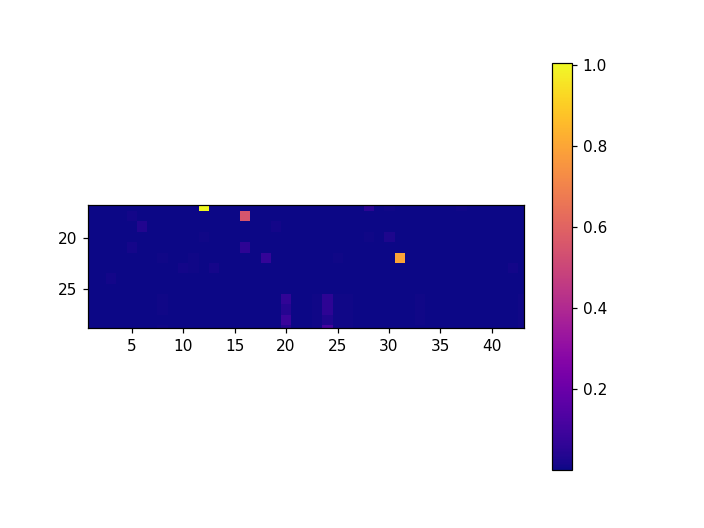

In [122]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(dists, 
           #vmin=0, vmax=10, 
           cmap='plasma')
plt.colorbar()

In [123]:
allowed_drift_th = 3
x_coords, y_coords = np.where(dists > 1/allowed_drift_th)
kept_spots_748, kept_spots_637 = daxp.spots_748[x_coords], daxp.spots_637[y_coords]
daxp.save_filename

'/lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5'

'Conv_zscan_001'

<IPython.core.display.Javascript object>


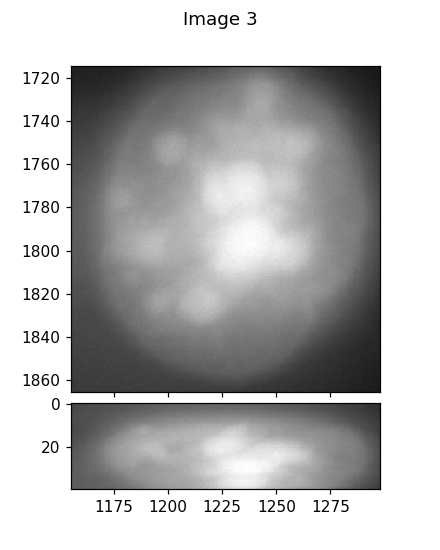

In [107]:
coord_dict = {
    'coords':list(np.concatenate([kept_spots_748.to_coords(), 
                             kept_spots_637.to_coords()])),
    'class_ids': list(0 * np.ones(len(kept_spots_748))) + list(1 * np.ones(len(kept_spots_637)))
}
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_748, daxp.im_637, daxp.im_405], use_dict=coord_dict)

In [109]:
from ChromAn.src.file_io.image_crop import crop_neighboring_area

In [112]:
_local_crop = crop_neighboring_area(daxp.im_637, kept_spots_637.to_coords()[10], 3)

In [114]:
_local_crop = crop_neighboring_area(daxp.im_405, kept_spots_637.to_coords()[10], 3)

In [115]:
np.mean(_local_crop)

37047.0

In [135]:
daxp._save_base_to_hdf5()

- use default save filename.
- saving to new file: /lab/weissman_imaging/puzheng/PE_LT/20230828-ingel_test_GuHCl-4T1-v21x-0813/Glyoxal_GuHCl_PuWash/Analysis/Conv_zscan_001.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels


In [ ]:
# run quick segmentation

In [ ]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()

In [ ]:
# generate a new